
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b4/Logo_Universidad_de_Granada.svg" width="400" align="left"  /> <br><br><br><br><br><br>


#### <span> Escuela Técnica Superior de Ingenierías Informática y Telecomunicación. Facultad de Ciencias </span>
<br>

### <span align="left" > DOBLE GRADO EN INGENIERÍA INFORMÁTICA Y MATEMÁTICAS </span>
<br>

# Sistemas dinámicos discretos e iteradas de funciones complejas: fractales, caos y estabilidad.
### Autor: David Armenteros Soto
<br><br><br>

## Librerías

   







In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import statistics
from PIL import Image, ImageDraw
import turtle
from  random import randint
import random as rand
import matplotlib.patches as patches
import pylab as pl

## <span style="color:#CB4335"> $\triangle$ Instrucciones: </span> 
Las imágenes en blanco y negro, las representaciones gráficas de funciones y los diagramas se generan con la librería $\textbf{matplotlib}$ por lo que la salida aparece en la propia consola de Python. Sin embargo, a la hora de utilizar la librería $\textbf{PIL}$ para imágenes en color y la librería $\textbf{turtle}$ para la construcción de fractales la salida no aparece por consola. Por ello, es necesario ejecutar la celda correspondiente para que  aparezcan las figuras en una ventana emergente. No obstante, en las celdas requeridas adjuntaré las imágenes que se obtienen como resultado. 

Para facilitar esta tarea, el símbolo <span style="color:#CB4335"> $\triangle$ </span> servirá de aviso para ejecutar la celda correspondiente


## <span style="color:Teal">Índice general</span>
<p style="color:Teal">1. Sistemas dinámicos discretos </p>
<p style="color:Teal">&nbsp;&nbsp;&nbsp;&nbsp; 1.1 Sistemas dinámicos discretos no lineales </p>
<p style="color:Teal">2. Introducción a la teoría del caos: exponente de Lyapunov </p>
<p style="color:Teal">3. Sistemas dinámicos complejos </p>
<p style="color:Teal">&nbsp;&nbsp;&nbsp;&nbsp; 3.1 El conjunto de Julia </p>
<p style="color:Teal">&nbsp;&nbsp;&nbsp;&nbsp; 3.2 El conjunto de Mandelbrot </p>
<p style="color:Teal">&nbsp;&nbsp;&nbsp;&nbsp; 3.3 Aplicación de la teoría de conjuntos de Julia al método de Newton </p>
<p style="color:Teal">4. Fractales </p>
<p style="color:Teal">&nbsp;&nbsp;&nbsp;&nbsp; 4.1 Ejemplos de fractales clásicos </p>
<p style="color:Teal">&nbsp;&nbsp;&nbsp;&nbsp; 4.2 Sistema de Lindenmayer (Sistema-L) </p>
<p style="color:Teal">&nbsp;&nbsp;&nbsp;&nbsp; 4.3 Sistema de funciones iteradas (SFI) </p>
<p style="color:Teal">5. Dimensión fractal </p>
<p style="color:Teal">&nbsp;&nbsp;&nbsp;&nbsp; 5.1 Dimensión box counting </p>

## 1. Sistemas dinámicos discretos
### 1.1 Sistemas dinámicos discretos no lineales
En este capítulo, se introducirán distintos ejemplos de sistemas dinámicos discretos no lineales. El siguiente código aporta una visión gráfica de estos sistemas. De esta manera, resulta más fácil calcular puntos fijos, puntos periódicos, órbitas y analizar comportamientos de atracción y repulsión. Los mapas que se presentarán son los siguientes:
- Mapa tienda
- Mapa logístico y diagrama de bifurcación
- Mapa de Gauss
- Mapa de Hénon


### Mapa tienda

Sea $T \colon [0,1] \to [0,1]$ continua.El mapa tienda viene dado por:
  
<center>
$T(x)=\left \{ \begin{matrix} \mu x & \mbox{si } 0 \leq x < \frac{1}{2}
\\ \mu(1-x) & \mbox{si }\frac{1}{2} \leq x \leq 1 \end{matrix}\right. \hspace{0.5cm} 0 \leq \mu \leq 2 $
</center>

In [3]:
def T(mu,x): 
    """
    Definición de la función tienda T(X).
    
    Parámetros
    ----------
    mu : Parámetro mu de la función tienda mu \in [0,2].  
    x : Parámetro x de la función tienda x \in [0,1] .
        
    Returns
    -------
    Valor de la función tienda. 
    """
    
    if x>=0 and x<=1/2:
        return mu*x
    elif x>=1/2 and x<=1: 
        return mu*(1-x)
    
def plotT(mu):
    """
    Representación del mapa tienda
    
    Parámetros
    ----------
    mu : Parámetro mu de la función tienda mu \in [0,2]. 
    """
    
    ejex1=np.linspace(0,1/2, 100)
    ejex2=np.linspace(1/2,1, 100)
    plt.plot(ejex1, mu*ejex1,'k-')
    plt.plot(ejex2, mu*(1-ejex2),'k-')
    plt.xlabel('x')
    plt.ylabel('T(x)')

Representación del mapa tienda cuando $\mu=\frac{3}{2}$.

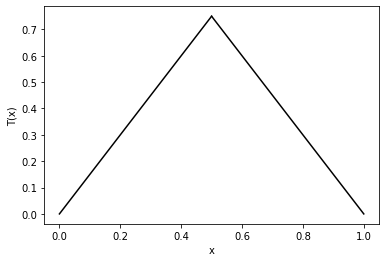

In [4]:
plotT(3/2)

Método para encontrar los puntos fijos de $T(x)$: intersección del mapa tienda  con la diagonal $y=x$.

In [5]:
def plotIntersectionT(mu):
    """
    Intersección del mapa tienda con la diagonal y=x
    
    Parámetros
    ----------
    mu : Parámetro mu de la función tienda mu \in [0,2]. 
    """ 
    plotT(mu)
    ejex=np.linspace(0,1, 20)
    plt.plot(ejex, ejex,'r-')
    plt.show()    

Puntos fijos cuando:
- $ 0 \leq \mu <1$
- $ \mu = 1$
- $ 1 < \mu \geq 2$

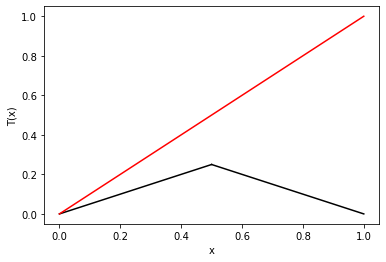

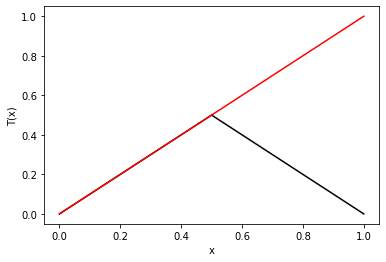

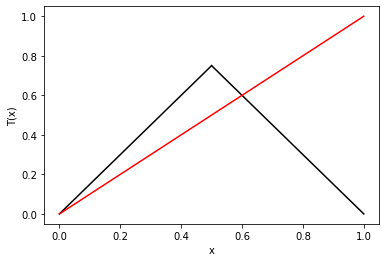

In [6]:
plotIntersectionT(1/2)
plotIntersectionT(1)
plotIntersectionT(3/2)

Cálculo de la órbita $O^+(x_0)$. 

In [7]:
def tentMap(mu,x0,n):
    """
    Cálculo y representación gráfica de la órbita de un punto del mapa tienda
    
    Parámetros
    ----------
    mu : Parámetro mu de la función tienda mu \in [0,2]. 
    x0 : Valor inicial x0 \in [0,1].
    n : Número de iteraciones
    """ 
    
    #Arrays para almacenar los puntos para representar la órbita
    inputs = np.array([])
    outputs = np.array([])
    
    #Primer punto (x0,0)
    inputs = np.append(inputs, x0)
    outputs = np.append(outputs, 0)
    
    print("X0:  ",x0)
    x=x0
    
    #Obtención de los puntos, como resultado de las iteraciones de T
    for i in range(1,n):
        inputs = np.append(inputs, x)
        inputs = np.append(inputs, x)
        outputs = np.append(outputs, x)
        x=T(mu,x)
        print("Iteración ", i ," :" ,x)
        outputs = np.append(outputs, x)
    
    #Obtenemos como resultados dos conjuntos de puntos:
    #    inputs  = { x0, x0,   x0,  T(x0), T(x0), ...}
    #    outputs = { 0,  x0, T(x0), T(x0), T^2(x0), ...}
        
        
    #Representamos los puntos en el plano (azul)
    plt.plot(inputs,outputs,'b-')
    
    #Gráfica de la función tienda y la recta y=x
    plotIntersectionT(mu)

Iteraciones del mapa tienda cuando $\mu=2$ y $x_0=\frac{1}{5}$.

X0:   0.2
Iteración  1  : 0.4
Iteración  2  : 0.8
Iteración  3  : 0.3999999999999999
Iteración  4  : 0.7999999999999998
Iteración  5  : 0.40000000000000036
Iteración  6  : 0.8000000000000007
Iteración  7  : 0.3999999999999986
Iteración  8  : 0.7999999999999972
Iteración  9  : 0.4000000000000057
Iteración  10  : 0.8000000000000114
Iteración  11  : 0.39999999999997726
Iteración  12  : 0.7999999999999545
Iteración  13  : 0.40000000000009095
Iteración  14  : 0.8000000000001819
Iteración  15  : 0.3999999999996362
Iteración  16  : 0.7999999999992724
Iteración  17  : 0.4000000000014552
Iteración  18  : 0.8000000000029104
Iteración  19  : 0.39999999999417923


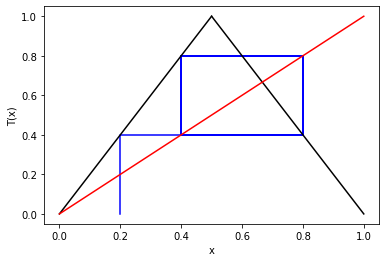

In [8]:
tentMap(2, 0.2, 20)

Iteraciones del mapa tienda cuando $\mu=\frac{3}{2}$ y $x_0=\frac{1}{3}$.

X0:   0.3333333333333333
Iteración  1  : 0.5
Iteración  2  : 0.75
Iteración  3  : 0.375
Iteración  4  : 0.5625
Iteración  5  : 0.65625
Iteración  6  : 0.515625
Iteración  7  : 0.7265625
Iteración  8  : 0.41015625
Iteración  9  : 0.615234375
Iteración  10  : 0.5771484375
Iteración  11  : 0.63427734375
Iteración  12  : 0.548583984375
Iteración  13  : 0.6771240234375
Iteración  14  : 0.48431396484375
Iteración  15  : 0.726470947265625
Iteración  16  : 0.4102935791015625
Iteración  17  : 0.6154403686523438
Iteración  18  : 0.5768394470214844
Iteración  19  : 0.6347408294677734
Iteración  20  : 0.5478887557983398
Iteración  21  : 0.6781668663024902
Iteración  22  : 0.48274970054626465
Iteración  23  : 0.724124550819397
Iteración  24  : 0.41381317377090454
Iteración  25  : 0.6207197606563568
Iteración  26  : 0.5689203590154648
Iteración  27  : 0.6466194614768028
Iteración  28  : 0.5300708077847958
Iteración  29  : 0.7048937883228064
Iteración  30  : 0.44265931751579046
Iteración  31  : 0.663

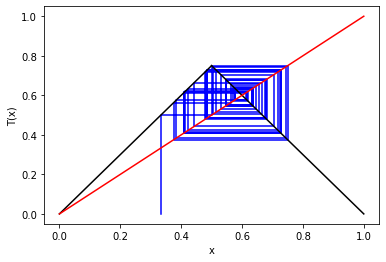

In [9]:
tentMap(3/2, 1/3, 50)

Definición y representación de la segunda iterada $T^2(x)$. Método para encontrar los puntos periódicos de periodo dos del sistema.


In [10]:
def T2(mu,x):
    """
    Definición de la segunda iterada de la función tienda T^2(X).
    
    Parámetros
    ----------
    mu : Parámetro mu de la función tienda mu \in [0,2].
    x : Parámetro x de la función tienda x \in [0,1] 
        
    Returns
    -------
    Valor de la segunda iterada de la función tienda. 
    """
    
    if x>=0 and x<=1/(2*mu):
        return mu*mu*x
    elif x>1/(2*mu) and x<=1/2: 
        return mu*(1-mu*x)
    elif x> 1/2 and x<=1-1/(2*mu): 
        return mu*(1-mu*(1-x))
    elif x>1-1/(2*mu) and x<=1: 
        return mu*mu*(1-x)
    
def plotIntersectionT2(mu):
    """
    Intersección de la segunda iterada del mapa tienda con la diagonal y=x
    
    Parámetros
    ----------
    mu : Parámetro mu de la función tienda mu \in [0,2]. 
    """ 
    
    ejex=np.linspace(0,1, 4)
    plt.plot(ejex, ejex,'r-')
    
    ejex1=np.linspace(0,1/(2*mu), 10)
    ejex2=np.linspace(1/(2*mu),1/2, 10)
    ejex3=np.linspace(1/2, 1-1/(2*mu), 10)
    ejex4=np.linspace(1-1/(2*mu),1, 10)
    
    plt.plot(ejex1,mu*mu*ejex1 ,'k-')
    plt.plot(ejex2,mu*(1-mu*ejex2) ,'k-')
    plt.plot(ejex3,mu*(1-mu*(1-ejex3)) ,'k-')
    plt.plot(ejex4,mu*mu*(1-ejex4),'k-')
    
    plt.xlabel('x')
    plt.ylabel('T^2(x)')
    plt.show()

Intersección de la diagonal $y=x$ con la segunda iterada del mapa tienda cuando $\mu=2$ (puntos de periodo dos).

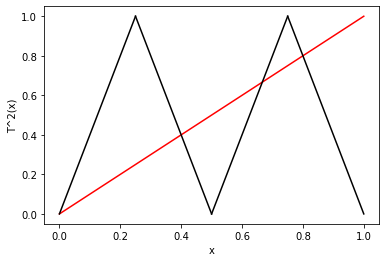

In [11]:
plotIntersectionT2(2)

### Mapa logístico y diagrama de bifurcación 

Sea $f_\mu \colon [0,1] \to [0,1]$ continua. El mapa logístico viene dado por:
<center>
$f_\mu(x)=\mu x(1-x)$ $\hspace{0.5cm}$ $ \mu \in [0,4]$ 
</center>

In [12]:
def logistic(mu,x):
    """
    Definición de la función logśitica.
    
    Parámetros
    ----------
    mu : Parámetro mu de la función logística mu  \in [0,4].  
    x : Parámetro x de la función logística x \in [0,1] .
        
    Returns
    -------
    Valor de la función logística. 
    """
    return mu*x*(1.0-x)

def plotLogistic(mu):
    """
    Representación de la función logística
    
    Parámetros
    ----------
    mu : Parámetro mu de la función logística mu  \in [0,4].  
    """
    
    ejex=np.linspace(0,1, 50)
    plt.plot(ejex, mu*ejex*(1.0-ejex),'k-')
    plt.xlabel('x')
    plt.ylabel('f(x) logística')
    plt.show()

Representación del mapa logístico cuando $\mu=\frac{3}{2}$. Observamos como el máximo se alcanza en $\frac{\mu}{4}$.

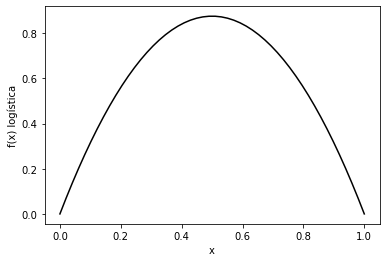

In [13]:
plotLogistic(3.5)

Cálculo de las iteraciones del mapa logístico: $f^n_\mu(x)$.

In [14]:
def plotLogisticIterations(mu,x0,n):
    """
    Cálculo de las iteraciones de la función logística a partir de un valor inicial
    
    Parámetros
    ----------
    mu : Parámetro mu de la función logística mu \in [0,4]. 
    x0 : Valor inicial x0 \in [0,1].
    n : Número de iteraciones
    """ 
    #Cada posición del array ejex contiene la iteración 'i' y el ejey contiene su correspondiente valor f^i(x0)
    ejex = np.array([])
    ejey = np.array([])
    
    for i in range(1,n):
        x=x0
        for j in range(i):
            x=logistic(mu,x)
        ejex = np.append(ejex, i)
        ejey =np.append(ejey,x)

    plt.plot(ejex, ejey,'k-')
        
    plt.xlabel('n')
    plt.ylabel('f^n(x)')
    plt.show()

Iteraciones del mapa logístico $f^n_\mu(x)$ cuando $x_0=\frac{1}{2}$ y $\mu$ cumple:
- $ 0 \leq \mu \leq 1$
- $ 1 < \mu \leq 3$
- $ 3 < \mu \leq 1+\sqrt{6}$
- $ 1+\sqrt{6} < \mu \leq 3.57 $ (punto de entrada al caos)
- $ 3.57 < \mu \leq 1 +\sqrt{8}$
- $ \mu >  1 +\sqrt{8}$

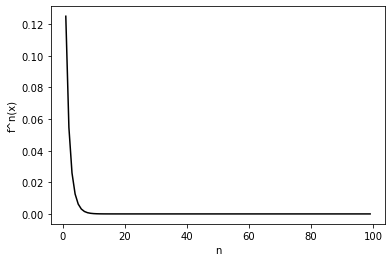

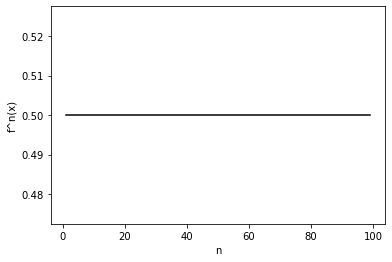

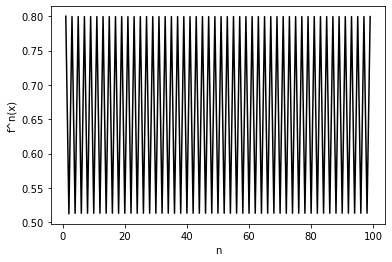

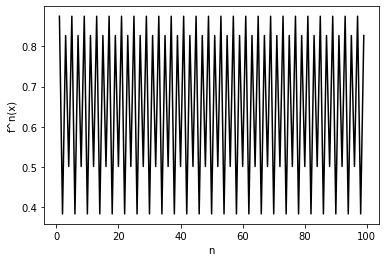

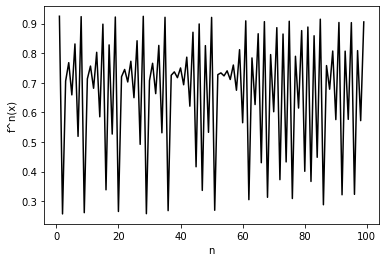

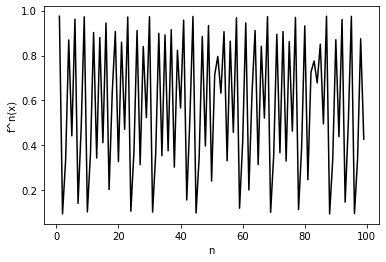

In [15]:
plotLogisticIterations(1/2,1/2,100)
plotLogisticIterations(2,1/2,100)
plotLogisticIterations(3.2,1/2,100)
plotLogisticIterations(3.50,1/2,100)
plotLogisticIterations(3.7,1/2,100)
plotLogisticIterations(3.9,1/2,100)

Diagrama de bifurcación o Feigenbaum para $ \mu \in[a,b] \subseteq [0,4]$ .

In [16]:
def bifDiagramLogistic(a,b,x0):
    """
    Diagrama de bifurcación del mapa logístico
    
    Parámetros
    ----------
    a: extremo inferior del intervalo [a,b] \subset [0,4]
    b: extremo superior del intervalo [a,b] \subset [0,4]
    x0 : Valor inicial x0 \in [0,1].
    """ 
    
    #Particionamos el intervalo [a,b] donde se mueve el valor de mu
    mu=np.arange(a,b,0.0001)
    
    #Para una mayor precisión, solo dibujamos las últimas 100 iteraciones
    #Número de iteraciones sin salida
    iteraciones=1500
    #Número de iteraciones para dibujar
    ultimas=100
    
    for i in range(iteraciones+ultimas):
        x0=logistic(mu,x0)
        if i>=iteraciones:
            plt.plot(mu,x0,color='black',markersize=0.1)
          
    plt.xlabel('\N{GREEK SMALL LETTER MU}')
    plt.ylabel('Xn')
    plt.show()

Diagrama de bifurcación o Feigenbaum para $x_0=\frac{1}{2}$

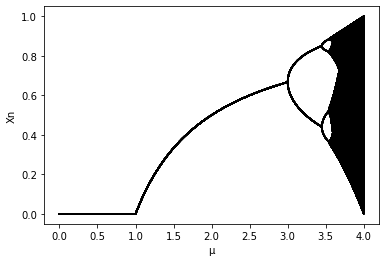

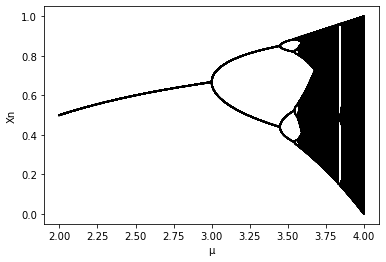

In [17]:
bifDiagramLogistic(0, 4, 1/2)
bifDiagramLogistic(2, 4, 1/2)

### Mapa de Gauss

Sea $G \colon \mathbb{R} \to \mathbb{R}$ continua. El mapa de Gauss de Gauss viene dado por:
<center>
$G(x)=e^{-\alpha x^2}+\beta$ $\hspace{0.5cm} $ $\alpha, \beta$ constantes
</center>

In [18]:
def gauss(alfa,beta,x):
    """
    Definición de la función de Gauss.
    
    Parámetros
    ----------
    alfa : Parámetro alfa de la función de Gauss, alfa es una constante real.
    beta : Parámetro beta de la función de Gauss, beta es una constante real.
    x : Parámetro x de la función de Gauss x \in R .
        
    Returns
    -------
    Valor de la función de Gauss. 
    """
    return math.exp(-alfa*x*x)+beta

def plotGauss(alfa,beta):
    """
    Representación de la función de Gauss.
    
    Parámetros
    ----------
    alfa : Parámetro alfa de la función de Gauss, alfa es una constante real.
    beta : Parámetro beta de la función de Gauss, beta es una constante real.
    """

    ejex = np.array([])
    ejey = np.array([])
    ejex=np.linspace(-2,2, 50)
    for i in range (50):
        x=gauss(alfa, beta, ejex[i])
        ejey =np.append(ejey,x)

    plt.plot(ejex, ejey ,'k-')
    plt.xlabel('x')
    plt.ylabel('G(x) Gauss')
    plt.show()

Representación del mapa de Gauss para:
- $\alpha=1$ y $\beta=4$
- $\alpha=4$ y $\beta=1$

El parámetro $\beta$ traslada la función de Gauss en el eje de ordenadas. El parámetro $\alpha$ tiene relación con la anchura de la curva. 

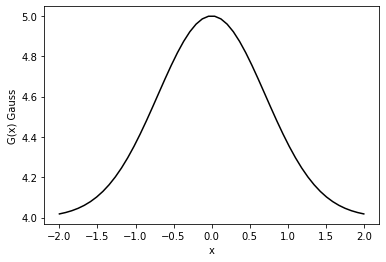

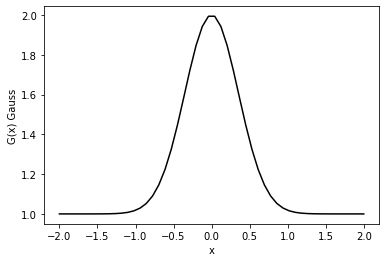

In [19]:
plotGauss(1,4)
plotGauss(4,1)

Método para encontrar los puntos fijos de $G(x)$: intersección con la diagonal $y=x$.

In [20]:
def plotIntersectionGauss(alfa,beta):
    """
    Representación de la intersección del mapa de Gauss con la diagonal.
    
    Parámetros
    ----------
    alfa : Parámetro alfa de la función de Gauss, alfa es una constante real.
    beta : Parámetro beta de la función de Gauss, beta es una constante real.
    """

    ejex=np.linspace(-2,2, 20)
    plt.plot(ejex, ejex,'r-')
    plotGauss(alfa,beta)

El mapa $G(x)$ se interseca con la diagonal en uno, dos o tres puntos.

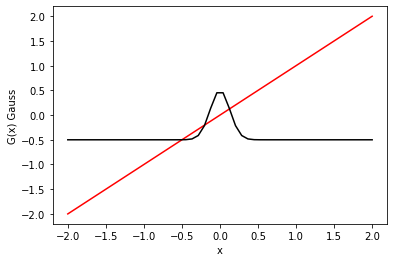

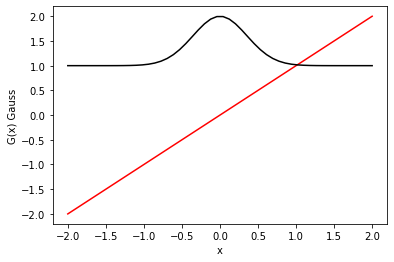

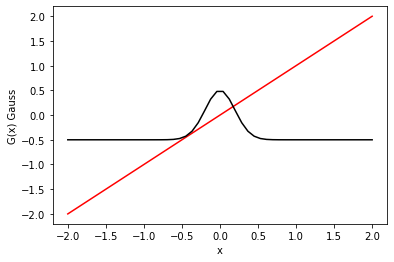

In [21]:
plotIntersectionGauss(30,-1/2)
plotIntersectionGauss(4,1)
plotIntersectionGauss(13,-1/2)

Diagrama de bifurcación o Feigenbaum en el intervalo $[a,b]$

In [22]:
def bifDiagramGaussMap(a,b,alfa,x0):
    """
    Diagrama de bifurcación del mapa de Gauss
    
    Parámetros
    ----------
    a: extremo inferior del intervalo [a,b] 
    b: extremo superior del intervalo [a,b] 
    alfa : Parámetro alfa de la función de Gauss, alfa es una constante real.
    x0 : Valor inicial x0 \in [0,1].
    """ 
    #Particionamos el intervalo [a,b] donde se mueve el valor de beta
    beta=np.linspace(a,b,500)
    #Número de iteraciones 
    iteraciones=50
   
    for i in beta:
        for j in range(iteraciones):
            x0=gauss(alfa,i,x0)
            plt.plot(i,x0,'^',color='black',markersize=0.1)
       
                
    plt.xlabel('\N{GREEK SMALL LETTER BETA}')
    plt.ylabel('Xn')
    plt.show()

Diagrama de bifurcación o Feigenbaum del mapa de Gauss para $x_0=0$ cuando:
- $\alpha=8$
- $\alpha=4$

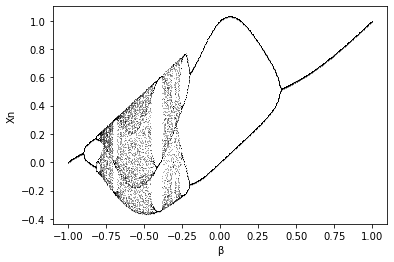

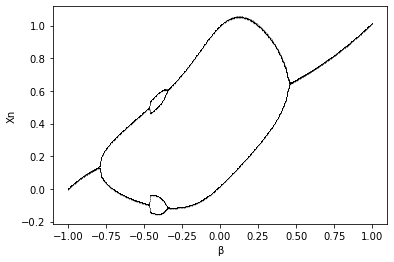

In [23]:
bifDiagramGaussMap(-1, 1, 8, 0)
bifDiagramGaussMap(-1, 1, 4, 0)

### Mapa de Hénon

Definición y representación del mapa de Hénon, $P \colon \mathbb{R} \to \mathbb{R}$ y $Q \colon \mathbb{R} \to \mathbb{R}$:
<center>
$P(x,y)=1-y+\alpha x^2$  
</center>
<center>
$Q(x,y)=\beta x$
</center>
a partir de un valor inicial $(x_0,y_0)$.

In [24]:
def henon(alfa,beta,x,y):
    """
    Definición de la función de Hénon.
    
    Parámetros
    ----------
    alfa : Parámetro alfa de la función de Hénon, alfa > 0.
    beta : Parámetro beta de la función de Hénon, |beta|<1.
    x: coordenada x del punto (x,y) del mapa de Hénon.
    y: coordenada y del puntos (x,y) del mapa de Hénon.
        
    Returns
    -------
    Valor de la función de Hénon. 
    """
    
    return 1+y-alfa*x*x, beta*x

def henonMap(alfa,beta,x0,y0,n):
    """
    Cálculo de la órbita de un punto del mapa de Hénon. 
    
    Parámetros
    ----------
    alfa : Parámetro alfa de la función de Hénon, alfa > 0.
    beta : Parámetro beta de la función de Hénon, |beta|<1.
    x0: coordenada x del valor inicial (x0,y0) del mapa de Hénon.
    y0: coordenada y del valor inicial (x0,y0) del mapa de Hénon.
    n: número de iteraciones
    """ 
    #Arrays para guardar los puntos que pertenecen al mapa
    x= np.array([])
    y= np.array([])
    #Valor inicial (x0,y0)
    x= np.append(x, x0)
    y= np.append(y, y0)
    print("X0,Y0 : (" ,x0," , " ,y0, " )")
    
    #Iteraciones del mapa
    for i in range (1,n):
        x0, y0 =henon(alfa,beta,x0,y0)
        x= np.append(x, x0)
        y= np.append(y ,y0)
        print("Iteración ", i ," : (" ,x0," , " ,y0, " )")
        
 
     #La opcion '^' es para pintar SOLO los puntos
    plt.plot(x,y,'^', color='black',markersize=0.7 )
    plt.show()

Mapa de Hénon para $\alpha=1.2$, $\beta=0.4$ y valor inicial $(0.1,0)$

X0,Y0 : ( 0.1  ,  0  )
Iteración  1  : ( 0.988  ,  0.04000000000000001  )
Iteración  2  : ( -0.13137279999999985  ,  0.3952  )
Iteración  3  : ( 1.3744894249041921  ,  -0.05254911999999994  )
Iteración  4  : ( -1.3196145350081478  ,  0.5497957699616769  )
Iteración  5  : ( -0.5398632552440474  ,  -0.5278458140032591  )
Iteración  6  : ( 0.12241138476150143  ,  -0.21594530209761897  )
Iteración  7  : ( 0.766073241359307  ,  0.048964553904600576  )
Iteración  8  : ( 0.34472270055249465  ,  0.3064292965437228  )
Iteración  9  : ( 1.163828808212277  ,  0.13788908022099786  )
Iteración  10  : ( -0.487507913568773  ,  0.4655315232849108  )
Iteración  11  : ( 1.180334764334297  ,  -0.1950031654275092  )
Iteración  12  : ( -0.8668313525028294  ,  0.47213390573371883  )
Iteración  13  : ( 0.5704579933154575  ,  -0.34673254100113177  )
Iteración  14  : ( 0.26276067243386997  ,  0.22818319732618303  )
Iteración  15  : ( 1.1453313921527035  ,  0.10510426897354799  )
Iteración  16  : ( -0.469036528

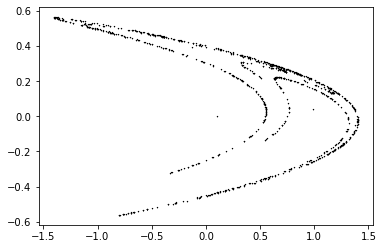

In [26]:
henonMap(1.2, 0.4, 0.1, 0, 1000)

## 2. Introducción a la teoría del caos: exponente de Lyapunov
Teoricamente, ya conocemos cuando un sistema dinámico es caótico o no, sin embargo, necesitamos un método computacional que nos asegure o desmienta esto último. Para esto utilizaremos el exponente de Lyapunov junto con los resultados expuestos en el capítulo $2$. La finalidad del siguiente código es comprobar para que valores de $\mu$ el mapa logístico es caótico.    

In [27]:
def logisticDerivative(mu,x):
    """
    Definición de la derivada de la función logística.
    
    Parámetros
    ----------
    mu : Parámetro mu de la función logística mu  \in [0,4].  
    x : Parámetro x de la función logística x \in [0,1] .
        
    Returns
    -------
    Valor de la derivada de la función logística. 
    """
    return mu*(1.0-2*x)

Cálculo del exponente de Lyapunov en el intervalo $[a,b] \subseteq [0,4]$

In [28]:
def LyapunovExponentLogistic(a,b,x0):
    """
    Exponente de Lyapunov para la función logística
    
    Parámetros
    ----------
    a: extremo inferior del intervalo [a,b] \subset [0,4]
    b: extremo superior del intervalo [a,b] \subset [0,4]
    x0 : Valor inicial x0 \in [0,1]. 
    """
   
    #Particionamos el intervalo [a,b] donde se mueve el valor de mu
    mu=np.arange(a,b,0.01)
    #Número de iteraciones sin salida
    iteraciones=1500
    #Número de iteraciones para dibujar
    ultimas=100
    
    #Guardamos el valor de las derivadas 
    derivadas=[]
    #Guardamos el valor de la media de las derivadas 
    media=[]
    
    print ("Para a: ", a, " b: ", b, " x0: ", x0, "Se tiene que: ")
    
    
    for pos in range (mu.size):
        x=x0
        derivadas=[]
        
        for i in range (iteraciones):

            x=logistic(mu[pos],x)
            aux1=logisticDerivative(mu[pos],x)
            if(aux1 != 0):
                aux=math.log(abs(aux1))
                derivadas=np.append(derivadas,aux)
        if(  len(derivadas) != 0):
            media=np.append(media,statistics.mean(derivadas))
        else:
            media=np.append(media,0)
        
        aprox=round(mu[pos],2)
        
        if aprox == 0.5:
            print ("Si mu: ", 0.5, " el exponente de Lyapunov es: ", media[len(media)-1])
        if aprox == 1:
            print ("Si mu: ", 1, " el exponente de Lyapunov es: ", media[len(media)-1])
        if aprox == 2.5:
            print ("Si mu: ", 2.5, " el exponente de Lyapunov es: ", media[len(media)-1])
        if aprox == 3:
            print ("Si mu: ", 3, " el exponente de Lyapunov es: ", media[len(media)-1])
        if aprox == 3.5:
            print ("Si mu: ", 3.5, " el exponente de Lyapunov es: ", media[len(media)-1])
        if aprox == 3.6:
            print ("Si mu: ", 3.6, " el exponente de Lyapunov es: ", media[len(media)-1])
        if aprox == 3.97:
            print ("Si mu: ", 3.97, " el exponente de Lyapunov es: ", media[len(media)-1])

    fig=plt.figure()
    ax=fig.add_subplot()
    
    for i in range(iteraciones+ultimas):
        x0=logistic(mu,x0)
        if i>=iteraciones:
            
            if(i==iteraciones):    
                plt.plot(mu,x0,color='red',markersize=0.1, label='Diagrama bifurcación')
            else:
                plt.plot(mu,x0,color='red',markersize=0.1)
                
            
    
    ejex=np.linspace(a,b,1000)
    fnula=[0]*1000
    ax.plot(ejex,fnula,'black')
    ax.plot(mu,media,'b',label='Exponente de Lyapunov')
    ax.set_ylim(-1,1)
    ax.set_xlabel('\N{GREEK SMALL LETTER MU}')
    ax.grid('on')
    ax.legend(loc='best')

Exponente de Lyapunov y diagrama de bifurcación del mapa logístico para $x_0=0.6$

Para a:  0  b:  4  x0:  0.6 Se tiene que: 
Si mu:  0.5  el exponente de Lyapunov es:  -0.6934712553991744
Si mu:  1  el exponente de Lyapunov es:  -0.008079574760829886
Si mu:  2.5  el exponente de Lyapunov es:  -0.693147180559945
Si mu:  3  el exponente de Lyapunov es:  -0.004481546823803939
Si mu:  3.5  el exponente de Lyapunov es:  -0.8677680096313098
Si mu:  3.6  el exponente de Lyapunov es:  0.18339039448302466
Si mu:  3.97  el exponente de Lyapunov es:  0.5918410259123476


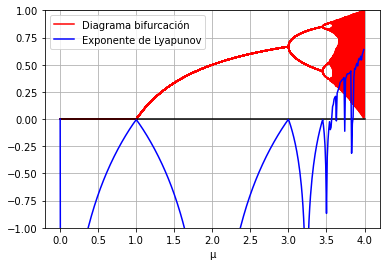

In [29]:
LyapunovExponentLogistic(0,4,0.6)

## 3. Sistemas dinámicos complejos
Los sistemas dinámicos estudiados hasta el momento están asociados a mapas cuyo dominio es $\mathbb{R}$. En este capítulo, se pretende ampliar la teoría examinando el comportamiento de la dinámica compleja. El objetivo que nos concierne es el de representar graficamente los $\textbf{conjuntos de Julia}$ y de $\textbf{Mandelbrot}$ y fractales de $\textbf{Newton}$. Se implementarán:
- Algoritmo para el conjunto de Julia relleno en blanco y negro
- Algoritmo de iteración inversa. Cerco del conjunto de Julia (color)
- Algoritmo de píxeles para el conjunto de Mandelbrot (blanco y negro)
- Conjunto de Mandelbrot M en color
- Fractal de Newton en color

El criterio de escape (teorema 3.2) y el criterio de parada (teorema 3.6) jugarán un papel fundamental en los algoritmos. 

### 3.1  El conjunto de Julia

Definición del conjunto de Julia relleno $\to$ $ K(f) = \left\{ z \in \mathbb{C}: O^+(z) \thinspace acotada \right\}$

Definición del conjunto de Julia $J(f)$ $\to$ frontera del conjunto de escape $E = \left\{ z \in \mathbb{C}: \lim_{n \to \infty} | f^n(z)| = \infty    \right\}$

Mapa cuadrático $\to$ $z_{n+1}=f_c(z_n)=z_n^2+c \hspace{0.25cm} con \hspace{0.25cm} c \in \mathbb{C}$

Criterio de escape $\to$ Dado $z \in \mathbb{C}$ y el mapa $f_c(z)=z^2+c$. Si $|z| > \max \left\{2,|c| \right\}$ entonces $ \lim_{n \to \infty} | f_c^n(z)| = \infty $.

In [30]:
def GenerateJuliaSet(c,it_max, mode):
    """
    Representación del conjunto de Julia
    
    Parámetros
    ----------
    c: constante compleja c del mapa f_c(z)=z^2+c asociado al conjunto de Julia
    it_max: iteraciones máximas para su representación
    mode: algoritmo de representación. Puede ser 'BlackWhite' (blanco y negro) o BackwardIteration (cerco del conjunto de Julia)
    """ 
    
    #Número de píxeles de la imágen 
    x_pix=512
    y_pix=512
         
    #Valores máximo y mínimo de ambos ejes
    xmin, xmax= -1.5, 1.5
    ymin, ymax= -1.5, 1.5
    
    #Valores de largo y ancho de la imagen
    w = xmax - xmin
    h= ymax - ymin
    
    #Radio umbral 
    radio_umbral= max(2,abs(c))
    
    #Modos
    if(mode == 'BlackWhite'):
        #Creamos un array inicializado a cero, que contendrá los valores de los píxeles
        julia_p= np.zeros((x_pix, y_pix))
    elif (mode=='BackwardIteration'):
        #Creamos una imagen en modo RGB (Red,Green,Blue) con píxeles (x_pix,y_pix) y color inicial (0,0,0)
        im = Image.new('RGB', (x_pix, y_pix), (0, 0, 0))
        draw = ImageDraw.Draw(im)

    #Recorremos los píxeles de la imagen    
    for i in range (x_pix):
        for j in range (y_pix):
            #Posición del pixel en el plano complejo
            z=complex(i/x_pix*w+xmin,j/y_pix*h+ymin)
            #Iteramos el número complejo
            it=0
            #Criterio de escape
            while abs(z)<=radio_umbral and it<it_max:
                z=z**2+c
                it+=1
                
            if(mode=='BlackWhite'):
                #El valor del pixel será 0 o 255 (negro o blanco) dependiendo del valor absoluto del número complejo z
                if( abs(z)<=radio_umbral):
                    julia_p[i,j]=0

                else:
                    julia_p[i,j]=255
            elif(mode=='BackwardIteration'):
                #Dibujamos el punto. El color dependerá del número de iteraciones que se han necesitado para sobrepasar el radio umbral
                draw.point([i,j],(it % 4 * 64 , it %   8 * 32, it %   16 * 16))
     
    if(mode=='BlackWhite'):
        #Dibujamos el array con la herramienta matplotlib
        fig, ax = plt.subplots()
        ax.imshow(julia_p, interpolation='nearest', cmap=cm.gnuplot2)
        plt.axis('off')
        plt.show()
        #fig.savefig('juliaSet.png', dpi=500)
    elif(mode=='BackwardIteration'):
        imagen='JuliaSet_'+ str(c)+'.png'
        #im.save(imagen)
        im.show()

<span style="color:#CB4335"> $\triangle$ </span> Conjunto de Julia relleno $K_0$ (disco unidad)

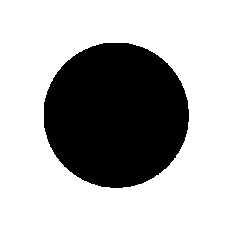

In [31]:
GenerateJuliaSet(complex(0,0),100,'BlackWhite')
GenerateJuliaSet(complex(0,0),1000,'BackwardIteration')

<p ><img src="Images/JuliaSet/JuliaSetBackwardIteration(0,0).png" width="200" align="left"/> </p>

<span style="color:#CB4335"> $\triangle$ </span> Conjunto de Julia relleno $K_{-0.1+0.8i}$ (El conejo de Douday)

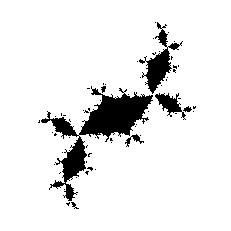

In [32]:
GenerateJuliaSet(complex(-0.1,0.8),100,'BlackWhite')
GenerateJuliaSet(complex(-0.1,0.8),1000,'BackwardIteration')

<p ><img src="Images/JuliaSet/JuliaSetBackwardIteration(-0,1,0,8).png" width="200" align="left"/> </p>

<span style="color:#CB4335"> $\triangle$ </span> Conjunto de Julia relleno $K_{-0.39-0.58i}$ (El disco de Siegel)

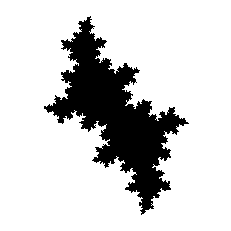

In [34]:
GenerateJuliaSet(complex(-0.39,-0.58),100,'BlackWhite')
GenerateJuliaSet(complex(-0.39,-0.58),1000,'BackwardIteration')  

<p ><img src="Images/JuliaSet/JuliaSetBackwardIteration(-0,39,-0,58).png" width="200" align="left"/> </p>

<span style="color:#CB4335"> $\triangle$ </span> Conjunto de Julia relleno $K_{-0.5+0.5i}$ ($J_{-0.5+0.5i}$ curva cerrada simple)

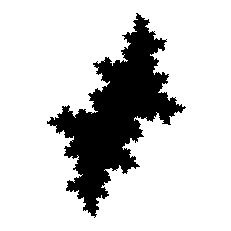

In [35]:
GenerateJuliaSet(complex(-0.5,0.5),100,'BlackWhite')
GenerateJuliaSet(complex(-0.5,0.5),1000,'BackwardIteration') 

<p ><img src="Images/JuliaSet/JuliaSetBackwardIteration(-0,5,0,5).png" width="200" align="left"/> </p>

<span style="color:#CB4335"> $\triangle$ </span> Conjunto de Julia relleno $K_{-1.1+0.1i}$ ($J_{-1.1+0.1i}$ no es curva cerrada simple)

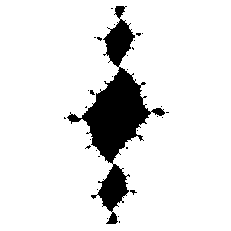

In [36]:
GenerateJuliaSet(complex(-1.1,0.1),100,'BlackWhite')
GenerateJuliaSet(complex(-1.1,0.1),1000,'BackwardIteration') 

<p ><img src="Images/JuliaSet/JuliaSetBackwardIteration(-1,1,0,1).png" width="200" align="left"/> </p>

<span style="color:#CB4335"> $\triangle$ </span> Conjunto de Julia relleno $K_{-0.2+0.75i}$ 

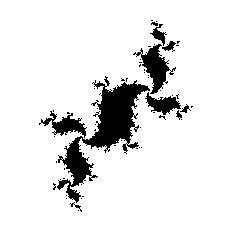

In [37]:
GenerateJuliaSet(complex(-0.2,0.75),100,'BlackWhite')
GenerateJuliaSet(complex(-0.2,0.75),1000,'BackwardIteration') 

<p ><img src="Images/JuliaSet/JuliaSetBackwardIteration(-0,2,0,75).png" width="200" align="left"/> </p>

<span style="color:#CB4335"> $\triangle$ </span> Conjunto de Julia relleno conexo $K_{0.377-0.248i}$ 

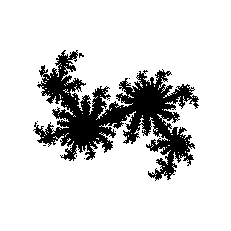

In [33]:
GenerateJuliaSet(complex(0.377,-0.248),100,'BlackWhite')
GenerateJuliaSet(complex(0.377,-0.248),1000,'BackwardIteration')

<p ><img src="Images/JuliaSet/JuliaSetConnected(0,377,-0,248).png" width="200" align="left"/> </p>

<span style="color:#CB4335"> $\triangle$ </span> Conjunto de Julia relleno disconexo $K_{-1.2i}$ 

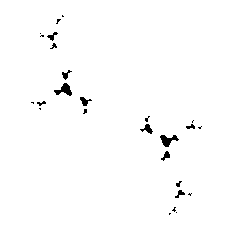

In [39]:
GenerateJuliaSet(complex(0,-1.2),7,'BlackWhite')
GenerateJuliaSet(complex(0,-1.2),1000,'BackwardIteration')

<p ><img src="Images/JuliaSet/JuliaSetDisconnected(0,-1,2).png" width="200" align="left"/> </p>

### 3.2  El conjunto de Mandelbrot

Definición del conjunto de Mandelbrot $\to$ $ M = \left\{ c \in \mathbb{C}: O^+(0) \hspace{0.25cm} acotada \thinspace bajo \thinspace f_c \right\} $ 

Caracterización del conjunto de Mandelbrot $\to$ $ M = \left\{ c \in \mathbb{C}: J_c \hspace{0.25cm} es \thinspace arcoconexo \right\} $

Criterio de parada $\to$ El conjunto de Mandelbrot $M$ está contenido en el disco cerrado de radio $2$:
$ M \subset \left\{c \in \mathbb{C}: |c| \leq 2 \right\} $ 

In [34]:
#1. Pasamos por argumento un número fijo de iteraciones máximas
def GenerateMandelbrotSet(it_max,mode):
    """
    Representación del conjunto de Mandelbrot
    
    Parámetros
    ----------
    it_max: iteraciones máximas para su representación
    mode: algoritmo de representación. Puede ser 'BlackWhite' (blanco y negro) o 'color' 
    
    """ 
    
    #Tamaño de la imagen (píxeles)
    x_pix=512
    y_pix=512
    
    if(mode=="BlackWhite"):
        #2. Tomamos un subconjunto que contenga al disco cerrado de radio 2
        xmin, xmax= -2, 1
        ymin, ymax= -2, 1
    elif (mode=="Color"):
        #2. Tomamos un subconjunto que contenga al disco cerrado de radio 2
        xmin, xmax= -2, 1
        ymin, ymax= -2, 1.5
        
    #Valores de largo y ancho de la imagen
    w = xmax - xmin
    h= ymax - ymin
    
    if(mode == "BlackWhite"):
       #Creamos un array inicializado a cero, que contendrá los valores de los píxeles
        mandelbrot_p= np.zeros((x_pix, y_pix))
    elif (mode == "Color"):
        #Creamos una imagen en el modo RGB (Red,Green,Blue) con tamaño el de los píxeles y color inicial (0,0,0) 
        im = Image.new('RGB', (x_pix, y_pix), (0, 0, 0))
        draw = ImageDraw.Draw(im)
    
    #Recorremos los píxeles de la imagen
    for i in range (x_pix):
        for j in range (y_pix):
            if (mode == "BlackWhite"):
                #Posición del pixel en el plano complejo
                c=complex(j/y_pix*h+ymin,i/x_pix*w+xmin)
            elif (mode == "Color"):
                c=complex(i/x_pix*w+xmin,j/y_pix*h+ymin)
            
            #3. Función de mandelbrot: dado un z=(0,0) inicial, iteramos el valor de c obteniendo así c,c^2, c+c^2, ... 
            z=complex(0,0)
            it=0
            while abs(z)<=2 and it<it_max:
                 z=z**2+c
                 it=it+1
            if (mode == "BlackWhite"):
                #4. Si alguna iteración sale del disco, dejamos de iterar y pintamos el punto de blanco, en otro caso, lo pintamos de negro.
                if(abs(z)<=2):
                   mandelbrot_p[i,j]=0 
                else:
                   mandelbrot_p[i,j]=255
            elif (mode == "Color"):
                #4. El color del punto dependerá del número de iteraciones
                draw.point([i,j],(it % 4 * 64  , it % 8 * 32  , it % 16 * 16))
            
    if (mode == "BlackWhite"):      
        #Dibujamos el array con la herramienta matplotlib
        fig, ax = plt.subplots()
        ax.imshow(mandelbrot_p, interpolation='nearest', cmap=cm.gnuplot2)
        plt.axis('off')
        plt.show()
        #fig.savefig('MandelbrotSetBlackWhite.png', dpi=500)
    elif (mode == "Color"):
        #im.save('MandelbrotSetColor.png', 'PNG')
        im.show()

<span style="color:#CB4335"> $\triangle$ </span> Conjunto de Mandelbrot en color y en blanco y negro.

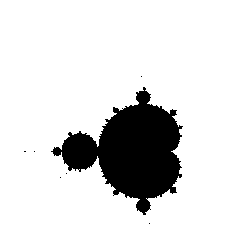

In [35]:
GenerateMandelbrotSet(1000,'BlackWhite')
GenerateMandelbrotSet(1000,'Color')

<p ><img src="Images/MandelbrotSet/MandelbrotSetColor.png" width="300" align="left"/> </p>

### 3.3  Aplicación de la teoría de conjuntos de Julia al método de Newton

Fórmula de Newton $\to$ Sea $p \colon \mathbb{C} \to \mathbb{C}$ un polinomio con coeficientes complejos y $f \colon \mathbb{C}\cup \left\{ \infty \right\} \to \mathbb{C}\cup \left\{ \infty \right\}$. Se tiene que:
\begin{equation}\label{NewtonFormula}
f(z)=z-\frac{p(z)}{p'(z)}
\end{equation}

Definición del polinomio $p(z)=z^n-1$

In [36]:
def f_polynomial(z,n):
    """
    Definición de la función polinómica f(z)=z^n-1
    
    Parámetros
    ----------
    z: parámetro z de la función polinómica
    n: grado del polinonio 
    """ 
    return z**n-1

Generación del fractal de Newton

In [37]:
def GenerateNewtonFractal(n):
    """
    Generación del fractal de Newton
    
    Parámetros
    ----------
    n: grado del polinonio    
    """
    
    #Tamaño de la imagen (píxeles)
    x_pix=600
    y_pix=400
    
    #Valores máximo y mínimo de ambos ejes
    xmin, xmax= -2.5, 2.5
    ymin, ymax= -2.5, 2.5
    
    #Valores de largo y ancho de la imagen
    w = xmax - xmin
    h= ymax - ymin
    
    #Número de iteraciones máximas
    iter_max=100
    
    #Tamaño de la derivada
    h=1e-6
    
    #Error permitido
    error=1e-3
    
    #Creamos imágenes en el modo RGB (Red,Green,Blue) con tamaño el de los píxeles y color inicial (0,0,0) 
    im = Image.new('RGB', (x_pix, y_pix), (0, 0, 0))
    draw = ImageDraw.Draw(im)
    
    #Recorremos los píxeles de la imagen
    for i in range (x_pix):
        for j in range (y_pix):
            #Posición del pixel en el plano complejo
            z=complex(i*w/(x_pix-1)+xmin,j*w/(y_pix-1)+ymin)
            
            #Aplicamos método de newton donde f(z)=z-p(z)/p'(z)
            for it in range(iter_max):
                #Calculamos el valor de la derivada
                dz=(f_polynomial(z+complex(h,h),n) - f_polynomial(z,n)   ) / complex(h,h)
                #Si el valor de la derivada es distinto de cero
                if dz != 0:
                    #Nuevo valor de f(z)
                    f_z=z-f_polynomial(z,n)/dz
                
                if abs(f_z-z) < error:
                    break
                z=f_z
             
            draw.point([i,j],(it % 4 * 64, it % 8 * 32, it % 16 * 16))
            
    #im.save('NewtonFractal.png', 'PNG')
    im.show()

<span style="color:#CB4335"> $\triangle$ </span> Conjunto de Julia asociado al método de Newton para las funciones $p(z)= z^n-1$ con $n=2,3,4,5$

In [38]:
for i in {2,3,4,5}:
    GenerateNewtonFractal(i)

<p ><img src="Images/NewtonFractal/NewtonFractal2.png" width="400" align="left"/> </p>

<p ><img src="Images/NewtonFractal/NewtonFractal3.png" width="400" align="left"/> </p>

<p ><img src="Images/NewtonFractal/NewtonFractal4.png" width="400" align="left"/> </p>

<p ><img src="Images/NewtonFractal/NewtonFractal5.png" width="400" align="left"/> </p>

## 4. Fractales
El objetivo principal de este capítulo es el de construir fractales con la ayuda de la librería $\textbf{turtle}$. Se generarán mediante tres perpectivas diferentes:

- Recursividad
- Reglas de producción (Sistemas de Lindenmayer)
- Iteraciones de un sistema de funciones (SFI): algoritmo determinista y aleatorio

### 4.1 Ejemplos de fractales clásicos
En esta sección, examinaremos diferentes ejemplos de fractales geométricos, que se obtienen a partir de un proceso de extracción de piezas (segmentos, triángulos, cuadrados,...), partiendo de una inicial, a través de un proceso recursivo.

#### 4.1.1 El conjunto de Cantor
El conjunto de Cantor se construye a partir de un intervalo cerrado mediante la eliminación sucesiva de una familia de subintervalos. 
Para la obtención de este fractal, tenemos que dividir cada segmento en tres partes iguales y eliminar el tercio medio. Por ello, es importante calcular la longitud de los segmentos, actualizar las posiciones de izquierda y derecha y realizar dos llamadas recursivas para construir el primer y último tercio. 

In [46]:
def cantorSet(izq,dercha,pos_inicial,distancia,iteraciones):
    """
    Representación del conjunto de Cantor
    
    Parámetros
    ----------
    izq: posición izquierda de inicio del segmento 
    dercha: posición derecha de inicio del segmento 
    pos_inicial: posición inicial
    distancia: distancia entre las líneas del conjunto de Cantor
    iteraciones: número de iteraciones a realizar
    
    Returns
    -------
    Para finalizar la recursividad
    
    """ 

    #Si el número de iteraciones es 0 dibujamos el segmento inicial
    if iteraciones == 0:
        turtle.up()
        turtle.goto(izq,(-pos_inicial+1)*distancia)
        turtle.down()
        turtle.goto(dercha,(-pos_inicial+1)*distancia)
        return
    
    #Si hay más de una iteración
    elif pos_inicial < iteraciones:
        
        #Dibujamos el segmento inicial
        turtle.up()
        turtle.goto(izq,(-pos_inicial+1)*distancia)
        turtle.down()
        turtle.goto(dercha,(-pos_inicial+1)*distancia)
        
        #Longitud del tercio del segmento 
        long=(dercha-izq)/3
        
        #Dibujamos el primer tercio 
        turtle.up()
        turtle.goto(izq,-pos_inicial*distancia)
        turtle.down()
        turtle.goto(izq+long,-pos_inicial*distancia)
        
        #Recursividad:
            #La posición derecha pasa a ser la izquierda más la longitud calculada
            #Aumentamos la posición inicial 
        cantorSet(izq,izq+long,pos_inicial+1,distancia,iteraciones)
        
        #Dibujamos el último tercio
        turtle.up()
        turtle.goto(izq+long*2,-pos_inicial*distancia)
        turtle.down()
        turtle.goto(dercha,-pos_inicial*distancia)
        
          #Recursividad:
            #La posición izquierda cambia y pasa a ser la izquierda más dos veces la longitud calculada
            #Aumentamos la posición inicial 
        cantorSet(izq+long*2,dercha,pos_inicial+1,distancia,iteraciones)
        
    else:
        #Acabamos la recursividad
        return

<span style="color:#CB4335"> $\triangle$ </span> Conjunto de Cantor $C_k$ para $k=0,1, ...,7$

In [47]:
turtle.ht()
for i in range(0,8):
    turtle.clear()
    turtle.title("Conjunto de Cantor en la iteración: " + str(i))
    cantorSet(-250, 250, 0, 10, i)
    
turtle.bye()

<p ><img src="Images/CantorSet/CantorSet0.png" width="400" align="left"/> </p>

<p ><img src="Images/CantorSet/CantorSet1.png" width="400" align="left"/> </p>

<p ><img src="Images/CantorSet/CantorSet2.png" width="400" align="left"/> </p>

<p ><img src="Images/CantorSet/CantorSet3.png" width="400" align="left"/> </p>

<p ><img src="Images/CantorSet/CantorSet4.png" width="400" align="left"/> </p>

<p ><img src="Images/CantorSet/CantorSet5.png" width="400" align="left"/> </p>

<p ><img src="Images/CantorSet/CantorSet6.png" width="400" align="left"/> </p>

<p ><img src="Images/CantorSet/CantorSet7.png" width="400" align="left"/> </p>

#### 4.1.2 El triángulo de Sierpinski
Se construye a partir de un triángulo equilátero $S_0$, cuyo lado es de longitud $1$ (por simplicidad). A continuación, conectamos los tres puntos medios del triángulo $S_0$. De esta forma, conseguimos cuatro triángulos equiláteros más pequeños. Para terminar, retiramos el triángulo del medio. Esto nos deja tres triángulos equiláteros de longitud $\frac{1}{2}$. En el próximo paso, repetimos el mismo procedimiento con los tres triángulos restantes para obtener $9$ triángulos equiláteros con lados de longitud $(\frac{1}{2})^2$. Si continuamos con la construcción, en la k-ésima etapa tendremos $3^k$ triángulos equiláteros con lados de longitud $(\frac{1}{2})^k$.

Función que devuelve el punto medio entre dos puntos $u$ y $v$. 

In [48]:
def Midpoint(u,v):
    """
    Calcula el punto medio 
    
    Parámetros
    ----------
    u: punto en el plano
    v: punto en el plano
    
    Returns
    -------
    Devuelve el punto medio
    """ 
    ux, uy = u
    vx, vy = v
    
    return (ux+vx)/2 , (uy+vy)/2 

Función que pinta un triángulo de vértices a,b,c

In [49]:
def DrawTriangle(a,b,c):
    """
    Dibuja un triángulo de vértices: a,b,c
    
    Parámetros
    ----------
    a: vértice del triángulo 
    b: vértice del triángulo
    c: vértice del triángulo
    """ 
    
    ax, ay = a
    bx, by = b 
    cx, cy = c
           
    turtle.up()
    turtle.goto(ax,ay)
    turtle.down()
    turtle.goto(bx,by)
    turtle.goto(cx,cy)
    turtle.goto(ax,ay)
    turtle.up()

Para construir el triángulo de Sierpinski tenemos que llamar recursivamente tres veces a la función, una por cada triángulo a generar. Es conveniente calcular los puntos medios de los lados del triángulo y aplicar recursividad con estos nuevos puntos.

In [50]:
def SierpinskiTriangle(etapa,triangulo):
    """
    Representación del triángulo de Sierpinski
    
    Parámetros
    ----------
    etapa: nivel de profundidad, número de etapas
    triangulo: triángulo inicial    
    """ 
     
    #Pinto el triángulo inicial S_0
    a, b, c = triangulo
    DrawTriangle(a, b, c)
    
    #Si la etapa es la 0, ya hemos terminado 
    if etapa == 0:
        return
        
    #En caso contrario, ...         
    else:
        
        #Calculos los puntos medios de los tres lados del triángulo
        d = Midpoint(a, b)
        e = Midpoint(b, c)
        f = Midpoint(a, c)
        
        #Realizamos llamadas recursivas, teniendo en cuenta los nuevos vértices. 
        #Disminuimos en uno la etapa inicial. 
        
        turtle.begin_fill() #Se utiliza para rellenar
        turtle.color('black') #De color negro
        SierpinskiTriangle(etapa-1, [a,d,f]) #Llamada recursiva para generar el primer triángulo
        turtle.end_fill()
        
        turtle.begin_fill()
        turtle.color('black')
        SierpinskiTriangle(etapa-1, [d,b,e])#Llamada recursiva para generar el segundo triángulo
        turtle.end_fill()
        
        turtle.begin_fill()
        turtle.color('black')
        SierpinskiTriangle(etapa-1, [f,e,c])#Llamada recursiva para generar el tercer triángulo
        turtle.end_fill()   

<span style="color:#CB4335"> $\triangle$ </span> Triángulo de Sierpinski $S_k$ para $k=0,1, ...,5$

In [52]:
#Eliminamos el cursor
turtle.ht()

#Velocidad 
turtle.speed(10)

triangulo=[[-200,-100],[0,300],[200,-100]]

for i in range (0,6):
    turtle.clear()
    turtle.title("Triángulo de Sierpinski en la iteración: " + str(i))
    SierpinskiTriangle(i, triangulo)
    if i==4:
        turtle.speed(0)
        
turtle.bye()

<p ><img src="Images/SierpinskiTriangle/SierpinskiTriangle0(color).png" width="200" align="left"/> </p>

<p ><img src="Images/SierpinskiTriangle/SierpinskiTriangle1.png" width="200" align="left"/> </p>

<p ><img src="Images/SierpinskiTriangle/SierpinskiTriangle2.png" width="200" align="left"/> </p>

<p ><img src="Images/SierpinskiTriangle/SierpinskiTriangle3.png" width="200" align="left"/> </p>

<p ><img src="Images/SierpinskiTriangle/SierpinskiTriangle4.png" width="200" align="left"/> </p>

<p ><img src="Images/SierpinskiTriangle/SierpinskiTriangle5.png" width="200" align="left"/> </p>

#### 4.1.3 La curva y el copo de nieve de Koch
La curva de Koch $K$ se forma a partir de un segmento de longitud $1$ (por simplicidad) que recibe el nombre de conjunto inicial $K_0$. Para construir $K_1$, dividimos el segmento $K_0$ en tres partes iguales y reemplazamos el tercio medio por otros dos segmentos de la misma longitud formando un ángulo de $60^o$. En otras palabras, reemplazamos el tercio medio por un triángulo equilátero. En la siguiente etapa, dividimos cada uno de los $4$ segmentos que forman $K_1$ en tres partes iguales y reemplazamos las partes centrales por triángulos equiláteros. En la k-ésima etapa tendremos $4^k$ segmentos de longitud $(\frac{1}{3})^k$.

Dado que partimos de un segmento inicial y reemplazamos el tercio medio por cuatro segmentos, parece razonable que sean necesarias cuatro llamadas recursivas, una por cada segmento a generar. En cada etapa, la longitud va disminuyendo, es por ello, que hay que actualizarla. 

In [53]:
def KochCurve(etapa,longitud):
    """
    Representación de la curva de Koch
    
    Parámetros
    ----------
    etapa: nivel de profundidad, número de etapas
    longitud: longitud de los segmentos    
    """ 

    #Si la etapa es 0
    if etapa == 0: 
        turtle.forward(longitud) #Segmento inicial k_0
        
    else:#En caso de no ser la etapa inicial, reemplazamos el tercio medio por 
         #dos segmentos formando un ángulo de 60º
         
        KochCurve(etapa-1, longitud/3)#LLamada recursiva para el primer segmento
        #Giro de 60º a la izquierda
        turtle.left(60)
        KochCurve(etapa-1, longitud/3)#LLamada recursiva para el segundo segmento
        #Giro de -120º a la izquierda 
        turtle.left(-120)
        KochCurve(etapa-1, longitud/3)#LLamada recursiva para el tercer segmento
        #Giro de 60º a la izquierda 
        turtle.left(60)
        KochCurve(etapa-1, longitud/3)#LLamada recursiva para el cuarto segmento

<span style="color:#CB4335"> $\triangle$ </span> Curva de Koch $K_k$ para $k=0,1, ..., 5$

In [57]:
#Eliminamos el cursor
turtle.ht()

turtle.speed(10)

for i in range(0,6):
    
    turtle.clear()
    turtle.title("Curva de Koch en la iteración: " + str(i))
    
    turtle.up()
    turtle.goto(-300,0)
    turtle.down()
    
    KochCurve(i, (i+1)*100)
    
    if i==4:
        turtle.speed(0)

turtle.bye()    

<p ><img src="Images/KochCurve/KochCurve0.png" width="300" align="left"/> </p>

<p ><img src="Images/KochCurve/KochCurve1.png" width="300" align="left"/> </p>

<p ><img src="Images/KochCurve/KochCurve2.png" width="300" align="left"/> </p>

<p ><img src="Images/KochCurve/KochCurve3.png" width="300" align="left"/> </p>

<p ><img src="Images/KochCurve/KochCurve4.png" width="300" align="left"/> </p>

<p ><img src="Images/KochCurve/KochCurve5.png" width="300" align="left"/> </p>

<span style="color:#CB4335"> $\triangle$ </span>  Si partimos de un triángulo equilátero y a cada lado le aplicamos el procedimiento para obtener la curva de Koch obtenemos el copo de nieve de Koch.  

In [59]:
turtle.speed(0)
turtle.clear()
turtle.up()
turtle.goto(-300,200)
turtle.down()

#Para generar el copo de nieve
for i in range (0,3):
    turtle.title("Copo de nieve de Koch ")
    KochCurve(4, 600)
    #Giro de 120 a la derecha 
    turtle.right(120)
 
turtle.bye()

<p ><img src="Images/KochCurve/KochSnowFlake.png" width="300" align="left"/> </p>

#### 4.1.4 El cuadrado de Koch
El cuadrado de Koch $K_k^{'}$ es una variación de la curva de Koch. En esta ocasión, partimos de un cuadrado $K_0^{'}$ de lado $1$ (por sencillez). Las distintas iteraciones se  construyen reemplazando cada segmento del conjunto por cinco de longitud $\frac{1}{3}$. En la k-ésima etapa, tendremos $4\cdot 5^k$ segmentos de longitud $(\frac{1}{3})^k$.

Se sigue el mismo procedimiento recursivo que en la curva de Koch, teniendo en cuenta que , hay cinco segmentos en vez de cuatro. 

In [60]:
def KochSquare(etapa,longitud):
    """
    Representación del cuadrado de Koch
    
    Parámetros
    ----------
    etapa: nivel de profundidad, número de etapas
    longitud: longitud de los segmentos    
    """ 
    
    #Si la etapa es 0
    if etapa == 0:
        turtle.forward(longitud)#Segmento inicial
    else:
        KochSquare(etapa-1, longitud/3)#LLamada recursiva para el primer segmento
        #Giro de 90º a la izquierda
        turtle.left(90)
        KochSquare(etapa-1, longitud/3)#LLamada recursiva para el segundo segmento
        #Giro de 270º a la izquierda
        turtle.left(270)
        KochSquare(etapa-1, longitud/3)#LLamada recursiva para el tercer segmento
        #Giro de 270º a la izquierda
        turtle.left(270)
        KochSquare(etapa-1, longitud/3)#LLamada recursiva para el cuarto segmento
        #Giro de 90º a la izquierda
        turtle.left(90)
        KochSquare(etapa-1, longitud/3)#LLamada recursiva para el quinto segmento


<span style="color:#CB4335"> $\triangle$ </span> Cuadrado de Koch $K_k^{'}$ para $k=0,1, ...,5$

In [62]:
#Eliminamos el cursor
turtle.ht()

turtle.speed(8)

for i in range(0,6):
    turtle.clear()
    turtle.title("Cuadrado de Koch en la iteración: " + str(i))
    
    turtle.up()
    turtle.goto(-200,200)
    turtle.down()
    for j in range (0,4):
        KochSquare(i, 400)
        turtle.right(90)
        
    if i==2:
        turtle.speed(0)

turtle.bye()

<p ><img src="Images/KochSquare/KochSquare0.png" width="200" align="left"/> </p>

<p ><img src="Images/KochSquare/KochSquare1.png" width="200" align="left"/> </p>

<p ><img src="Images/KochSquare/KochSquare2.png" width="200" align="left"/> </p>

<p ><img src="Images/KochSquare/KochSquare3.png" width="200" align="left"/> </p>

<p ><img src="Images/KochSquare/KochSquare4.png" width="200" align="left"/> </p>

<p ><img src="Images/KochSquare/KochSquare5.png" width="200" align="left"/> </p>

#### 4.1.5 Otros fractales
##### 4.1.5.1 La curva de Lévy
La curva de Lévy $L$ se forma a partir de un segmento $L_0$ de longitud $1$ (por sencillez). Para construir $L_1$, tomamos este segmento por la hipotenusa de un triángulo rectángulo e isósceles, y lo reemplazamos por los otros dos catetos del triángulo. En el siguiente paso, tomamos los dos segmentos anteriores como las hipotenusas de dos triángulos rectángulos e isósceles, y los reemplazamos por los dos catetos correspondientes. 

Dado que la curva de Lévy sustituye la hipotenusa de un triángulo rectángulo isósceles por los dos catetos del mismo. Serán necesarias dos llamadas recursivas para generar cada uno de los catetos. En cada etapa la longitud es igual a $\frac{1}{\sqrt{2}}$ de la anterior. 

In [63]:
def LevyCurve(etapa,longitud):
    """
    Representa la curva de Lévy
    
    Parámetros
    ----------
    etapa: nivel de profundidad, número de etapas
    longitud: longitud de los segmentos    
    """  
    
    #Si la etapa es 0
    if etapa == 0:
        turtle.forward(longitud)#Segmento inicial
    else:
        #Giro de 45 a la izquierda
        turtle.left(45)
        LevyCurve(etapa-1,longitud/math.sqrt(2))#Primera recursión
        #Giro de 90 a la derecha
        turtle.right(90)
        LevyCurve(etapa-1,longitud/math.sqrt(2))#Segunda Recursión
        #Giro de 45 a la izquierda
        turtle.left(45)      

<span style="color:#CB4335"> $\triangle$ </span>  Curva de Lévy $L_{k}$ para $k=0,1,2,4,6,9$

In [65]:
#Eliminamos el cursor
turtle.ht()

for i in {0,1,2,4,6,9}:
    turtle.clear()
    turtle.title("Curva de Lévy en la iteración: " + str(i))
    
    turtle.up()
    turtle.goto(-200,0)
    turtle.down()
    
    if(i<=4):
        l=100
    else:
        turtle.speed(0)
        l=200
    
    LevyCurve(i, l)

turtle.bye()

<p ><img src="Images/LevyCurve/LevyCurve0.png" width="200" align="left"/> </p>

<p ><img src="Images/LevyCurve/LevyCurve1.png" width="200" align="left"/> </p>

<p ><img src="Images/LevyCurve/LevyCurve2.png" width="200" align="left"/> </p>

<p ><img src="Images/LevyCurve/LevyCurve4.png" width="200" align="left"/> </p>

<p ><img src="Images/LevyCurve/LevyCurve6.png" width="200" align="left"/> </p>

<p ><img src="Images/LevyCurve/LevyCurve9.png" width="200" align="left"/> </p>

#### 4.1.5.2 La curva del dragón
La construcción de la curva del dragón D es muy similar a la de la curva de Lévy. Se forma a partir de un segmento $D_0$ de longitud $1$ (por simplicidad). Tomamos este segmento y construimos un triángulo rectángulo e isósceles. Finalmente, eliminamos el segmento inicial. En la siguiente etapa, aplicamos el mismo razonamiento a cada uno de los segmentos alternando la orientación de los triángulos.

La construcción de la curva del dragón es similar a la de la curva de Lévy. Incluimos el parámetro 'giro' para alternar la orientación de los triángulos.

In [66]:
def DragonCurve(etapa,longitud, giro="derecha"):
    """
    Representa la curva del dragón 
    
    Parámetros
    ----------
    etapa: nivel de profundidad, número de etapas
    longitud: longitud de los segmentos  
    giro: giro de la tortuga 
    """  

    #Si la etapa es cero, solo dibujamos el segmento inicial
    if etapa==0:
       turtle.forward(longitud)
       return 
   
    #En caso de que la etapa no sea la cero...
    
    #Giro de 45 a izquierda o derecha 
    if giro == "derecha":
        turtle.right(45)
    else:
        turtle.left(45)
        
    #LLamada recursiva con giro a la derecha 
    DragonCurve(etapa-1, longitud/math.sqrt(2), giro="derecha")
    
    #Giro de 90 a izquierda o derecha
    if giro == "derecha":
        turtle.left(90)
    else:
        turtle.right(90)
        
    #Llamada recursiva con giro a la izquierda
    DragonCurve(etapa-1, longitud/math.sqrt(2), giro='izquierda')
    
    #Giro de 45 a izquierda o derecha
    if giro == "derecha":
        turtle.right(45)
    else:
        turtle.left(45)

<span style="color:#CB4335"> $\triangle$ </span>  Curva del dragón $D_{k}$ para $k=0,1,2,6,9,12$

In [68]:
#Eliminamos el cursor
turtle.ht()
turtle.speed('fastest')

for i in {0,1,2,6,9,12}:
    turtle.clear()
    turtle.title("Curva del dragón en la iteración: " + str(i))
        
    turtle.up()
    turtle.goto(0,100)
    turtle.down()
    
    DragonCurve(i, (i+1)*10)

turtle.bye()

<p ><img src="Images/DragonCurve/DragonCurve0.png" width="200" align="left"/> </p>

<p ><img src="Images/DragonCurve/DragonCurve1.png" width="200" align="left"/> </p>

<p ><img src="Images/DragonCurve/DragonCurve2.png" width="200" align="left"/> </p>

<p ><img src="Images/DragonCurve/DragonCurve6.png" width="200" align="left"/> </p>

<p ><img src="Images/DragonCurve/DragonCurve9.png" width="200" align="left"/> </p>

<p ><img src="Images/DragonCurve/DragonCurve12.png" width="200" align="left"/> </p>

### 4.2 Sistema de Lindenmayer
En la sección anterior, utilicé los gráficos $\textbf{turtle}$ para construir diferentes objetos fractales. Se empleó la recursividad como forma de trabajo. El código expuesto anteriormente nos dá una idea de como funciona esta interfaz, sin embargo, en ningún momento se han dado las nociones formales de su uso. Por ello, presentaremos la librería turtle con mayor grado de descripción. 
    
Imaginemos una tortuga sentada en una hoja de papel mirando hacia una dirección. La cola de la tortuga está un poco sucia por lo que deja un rastro en el papel tan pronto como comience a moverse. La tortuga está completamente entrenada y entiende varios comandos que transmitimos por control remoto. Los comandos se dan en forma de símbolos que pueden ser letras ordinarias del alfabeto o carácteres especiales como $+$ o $-$. Las instrucciones que recibe la tortuga están detalladas en la sección 4.2. A continuación, describiré algunas de las funciones que más se utilizan:

- turtle.forward(length): dibuja una línea de longitud 'length'
- turtle.right(angle): giro a la derecha 
- turtle.left(angle): giro a la izquierda 
- turtle.penup(): levanta la tortuga 
- turtle.pendown(): deja la tortuga sobre el papel

Para más información se puede consultar el manual [Manual Turtle](https://docs.python.org/es/3.9/library/turtle.html).


   


Clase para los sistemas de Lindemayer

In [71]:
class LSystem:
    
    def __init__(self,axioma,reglas,longitud,theta):
        """
        Constructor de la clase  
    
        Parámetros
        ----------
        axioma: Axioma del sistema-L
        reglas: reglas de producción del sistema-L
        longitud: longitud del paso
        theta: ángulo de giro
        """ 
        self.axioma=axioma
        self.reglas=reglas
        self.longitud=longitud
        self.theta=theta
     
    def generate_word(self,iteraciones,palabra):
        """
        Genera la palabra final, asociada al fractal en una determinada iteración.
        Comienza por el axioma y aplica sucesivamente las distintas reglas.
    
        Parámetros
        ----------
        iteraciones: iteraciones que se llevarán a cabo
        palabra: palabra con la que comenzamos
        
        Returns
        -------
        Palabra final, trás aplicar las reglas de producción.
        """ 
        
        #Si el número de iteraciones es 0, devolvemos el axioma
        if iteraciones == 0:
            return palabra
        #En otro caso, aplicamos las reglas para obtener la palabra final
        else:
            palabra_final=''
            #Recorremos todos los caracteres de la palabra
            for caracter in list (palabra):
                #Si al carácter hay que aplicarle una regla, modificamos la palabra final
                #con la regla
                if caracter in self.reglas:
                    palabra_final+=self.reglas[caracter]
                #En caso contrario el carácter se queda como está
                else:
                    palabra_final+=caracter
            #Aplicamos recursividad, para realizar este proceso tantas veces como
            #iteraciones queramos 
            return self.generate_word(iteraciones-1,palabra_final)
 
    
    def draw_lsystem(self,iteraciones):
        """
        Define los comandos e interpreta la palabra final para construir el fractal
    
        Parámetros
        ----------
        iteraciones: iteraciones que se llevarán a cabo
        """
        
        #Pila para ramificaciones
        stack=[]
        
        #Generamos la palabra final
        palabra_final=self.generate_word(iteraciones, self.axioma)
            
        #Recorremos la palabra y aplicamos una interpretación gráfica de 
        #los comandos
        for comando in list(palabra_final):   
            turtle.pendown()
            
            if comando =="F":
                turtle.forward(self.longitud)
            elif comando =="f":
                turtle.penup()
                turtle.forward(self.longitud)
            elif comando == "+":
                turtle.left(self.theta)
            elif comando == "-":
                turtle.right(self.theta)
            elif comando == "L":
                turtle.left(self.theta)
                turtle.forward(self.longitud)
                turtle.right(self.theta)
                turtle.forward(self.longitud)
                turtle.right(self.theta)
                turtle.forward(self.longitud)
                turtle.left(self.theta)
            elif comando == "R":
                turtle.right(self.theta)
                turtle.forward(self.longitud)
                turtle.left(self.theta)
                turtle.forward(self.longitud)
                turtle.left(self.theta)
                turtle.forward(self.longitud)
                turtle.right(self.theta)
            elif comando == "S":
                turtle.forward(self.longitud)
                turtle.left(self.theta)
                turtle.forward(self.longitud)
                turtle.left(self.theta)
                turtle.forward(self.longitud)
                turtle.right(self.theta)
                turtle.forward(self.longitud)
                turtle.right(self.theta)
                turtle.forward(self.longitud)
            elif comando == "D":
                turtle.right(self.theta)
                turtle.right(self.theta)
                turtle.forward(self.longitud)
                turtle.left(self.theta)
                turtle.left(self.theta)
                turtle.forward(self.longitud)
            elif comando == "E":
                turtle.forward(self.longitud)
                turtle.right(self.theta)
                turtle.right(self.theta)
                turtle.forward(self.longitud)
                turtle.left(self.theta)
                turtle.left(self.theta)
            #Almacenamos el estado actual en la parte superior de la pila (posición, dirección)
            elif comando == "[":
                stack.append((turtle.position(), turtle.heading()) )
            #Eliminamos el tope de la pila y nos dirigimos a esa posición 
            elif comando == "]":
                turtle.penup()
                position, heading =stack.pop()
                turtle.goto(position)
                turtle.setheading(heading)
                turtle.pendown()

Punto y dirección de inicio de la tortuga

In [72]:
def start_drawing():
    """
    Define el punto y la dirección de inicio de la tortuga
    """
    turtle.clear()
    turtle.penup()
    turtle.goto(-350,-100)
    turtle.pendown() 
    turtle.setheading(0.0)

Definición y representación de sistemas-L:

<span style="color:#CB4335"> $\triangle$ </span>  $\textbf{Sistema de Lindenmayer de la curva de Koch}$ :
- Axioma: F
- Reglas de producción: 
<center> F $\to$ F+F--F+F </center>
<center> + $\to$ + </center>
<center> - $\to$ - </center> 
- Parámetros: $\theta=60^o$

In [81]:
if __name__ == '__main__':
    #Definición de la curva de Koch:
    kochCurve=LSystem('F', 
                 {'F': 'F+F--F+F' , '+': '+' , '-': '-'  }, 
                 5,
                 60,
                 )
    
    turtle.ht()
    turtle.speed('fastest')
    start_drawing()
    
    turtle.title("La curva de Koch mediante un sistema-L")
    iteracion=4
    palabra_final=kochCurve.generate_word(iteracion, kochCurve.axioma)
    print("La palabra que genera la curva de Koch en la iteración ", iteracion, " es: ", palabra_final)
    kochCurve.draw_lsystem(iteracion)
    turtle.bye()

La palabra que genera la curva de Koch en la iteración  4  es:  F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F+F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F+F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F+F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F+F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F+F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F+F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F+F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F+F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F+F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F+F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F


<p ><img src="Imagenes/KochCurve/KochCurve4.png" width="300" align="left"/> </p>

<span style="color:#CB4335"> $\triangle$ </span>  $\textbf{Sistema de Lindenmayer del cojunto de Cantor}$ :
- Axioma: F
- Reglas de producción: 
<center> F $\to$ FfF </center>
<center> f $\to$ fff </center>

In [92]:
    CantorSet=LSystem('F', 
                 {'F': 'FfF' , 'f': 'fff' ,   }, 
                 3,
                 0,
                 )
    
    turtle.ht()
    turtle.speed('fastest')
    start_drawing()
 
    turtle.title("El conjunto de Cantor mediante un sistema-L")
    iteracion=5
    palabra_final=CantorSet.generate_word(iteracion, CantorSet.axioma)
    print("La palabra que genera el conjunto de Cantor en la iteración ", iteracion, " es: ", palabra_final)
    CantorSet.draw_lsystem(iteracion)
    turtle.bye()

La palabra que genera el conjunto de Cantor en la iteración  5  es:  FfFfffFfFfffffffffFfFfffFfFfffffffffffffffffffffffffffFfFfffFfFfffffffffFfFfffFfFfffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffFfFfffFfFfffffffffFfFfffFfFfffffffffffffffffffffffffffFfFfffFfFfffffffffFfFfffFfF


<p ><img src="Imagenes/CantorSet/CantorSet5.png" width="400" align="left"/> </p>

<span style="color:#CB4335"> $\triangle$ </span>  $\textbf{Sistema de Lindenmayer de la curva de la punta de flecha de Sierpinski}$ :
- Axioma: L
- Reglas de producción: 
<center> L $\to$ +R-L-R+ </center>
<center> R $\to$ -L+R+L- </center>
<center> + $\to$ + </center> 
<center> - $\to$ - </center> 
- Parámetros: $\theta=60^o$

In [94]:
    SierpinskiArrowHead=LSystem('L', 
                 {'L': '+R-L-R+' , 'R': '-L+R+L-', '+': '+' , '-': '-'  }, 
                 3,
                 60,
                 )
    
    turtle.hideturtle()
    turtle.speed('fastest')
    start_drawing()
    
    turtle.title("La punta de flecha de Sierpinski mediante un sistema-L")
    iteracion=6
    palabra_final=SierpinskiArrowHead.generate_word(iteracion, SierpinskiArrowHead.axioma)
    print("La palabra que genera la curva de la punta de flecha de Sierpinski en la iteración ", iteracion, " es: ", palabra_final)
    SierpinskiArrowHead.draw_lsystem(iteracion)
    turtle.bye()

La palabra que genera la curva de la punta de flecha de Sierpinski en la iteración  6  es:  +-+-+-L+R+L--+R-L-R+--L+R+L-++-+R-L-R++-L+R+L-++R-L-R+-++-L+R+L--+R-L-R+--L+R+L-+--+-+R-L-R++-L+R+L-++R-L-R+--+-L+R+L--+R-L-R+--L+R+L-+--+R-L-R++-L+R+L-++R-L-R+-+--+-L+R+L--+R-L-R+--L+R+L-++-+R-L-R++-L+R+L-++R-L-R+-++-L+R+L--+R-L-R+--L+R+L-+-++-+-+R-L-R++-L+R+L-++R-L-R+--+-L+R+L--+R-L-R+--L+R+L-+--+R-L-R++-L+R+L-++R-L-R+-++-+-L+R+L--+R-L-R+--L+R+L-++-+R-L-R++-L+R+L-++R-L-R+-++-L+R+L--+R-L-R+--L+R+L-+-++-+R-L-R++-L+R+L-++R-L-R+--+-L+R+L--+R-L-R+--L+R+L-+--+R-L-R++-L+R+L-++R-L-R+-+-++-+-L+R+L--+R-L-R+--L+R+L-++-+R-L-R++-L+R+L-++R-L-R+-++-L+R+L--+R-L-R+--L+R+L-+--+-+R-L-R++-L+R+L-++R-L-R+--+-L+R+L--+R-L-R+--L+R+L-+--+R-L-R++-L+R+L-++R-L-R+-+--+-L+R+L--+R-L-R+--L+R+L-++-+R-L-R++-L+R+L-++R-L-R+-++-L+R+L--+R-L-R+--L+R+L-+-+--+-+-+R-L-R++-L+R+L-++R-L-R+--+-L+R+L--+R-L-R+--L+R+L-+--+R-L-R++-L+R+L-++R-L-R+-++-+-L+R+L--+R-L-R+--L+R+L-++-+R-L-R++-L+R+L-++R-L-R+-++-L+R+L--+R-L-R+--L+R+L-+-++-+R-L-R++-L+R+L-

<p ><img src="Imagenes/L-system/SierpinskiArrowHead.png" width="300" align="left"/> </p>

<span style="color:#CB4335"> $\triangle$ </span> $\textbf{Sistema de Lindenmayer de la curva del dragón}$ :
- Axioma: D
- Reglas de producción: 
<center> D $\to$ -D++E </center>
<center> E $\to$ D--E+ </center>
<center> + $\to$ + </center> 
<center> - $\to$ - </center> 
- Parámetros: $\theta=45^o$

In [96]:
    DragonCurve=LSystem('D', 
                 {'D': '-D++E' , 'E': 'D--E+', '+': '+' , '-': '-'  }, 
                 10,
                 45,
                 )
    
    turtle.ht()
    turtle.speed('fastest')
    start_drawing()
    
    turtle.title("La curva del dragón mediante un sistema-L")
    
    iteracion=6
    palabra_final=DragonCurve.generate_word(iteracion, DragonCurve.axioma)
    print("La palabra que genera la curva del dragón en la iteración ", iteracion, " es: ", palabra_final)
    DragonCurve.draw_lsystem(iteracion)
    turtle.bye()
    

La palabra que genera la curva del dragón en la iteración  6  es:  ------D++E++D--E+++-D++E--D--E++++--D++E++D--E+---D++E--D--E+++++---D++E++D--E+++-D++E--D--E++----D++E++D--E+---D++E--D--E++++++----D++E++D--E+++-D++E--D--E++++--D++E++D--E+---D++E--D--E+++-----D++E++D--E+++-D++E--D--E++----D++E++D--E+---D++E--D--E+++++


<p ><img src="Imagenes/DragonCurve/DragonCurve6.png" width="200" align="left"/> </p>

<span style="color:#CB4335"> $\triangle$ </span> $\textbf{Sistema de Lindenmayer de la curva de Peano}$ :
- Axioma: F
- Reglas de producción: 
<center> F $\to$ FF+F+F+FF+F+F-F </center>
<center> + $\to$ + </center> 
<center> - $\to$ - </center> 
- Parámetros: $\theta=90^o$

In [98]:
    PeanoCurve=LSystem('F', 
                 {'F': 'FF+F+F+FF+F+F-F' , '+': '+' , '-': '-'  }, 
                 50,
                 90,
                 )
    turtle.ht()
    turtle.speed('fastest')
    start_drawing()
    
    turtle.title("La curva de Peano mediante un sistema-L")
    
    iteracion=2
    palabra_final=PeanoCurve.generate_word(iteracion, PeanoCurve.axioma)
    print("La palabra que genera la curva de Peano en la iteración ", iteracion, " es: ", palabra_final)
    PeanoCurve.draw_lsystem(iteracion)
    turtle.bye()
    

La palabra que genera la curva de Peano en la iteración  2  es:  FF+F+F+FF+F+F-FFF+F+F+FF+F+F-F+FF+F+F+FF+F+F-F+FF+F+F+FF+F+F-F+FF+F+F+FF+F+F-FFF+F+F+FF+F+F-F+FF+F+F+FF+F+F-F+FF+F+F+FF+F+F-F-FF+F+F+FF+F+F-F


<p ><img src="Imagenes/L-system/PeanoCurve2.png" width="200" align="left"/> </p>

<span style="color:#CB4335"> $\triangle$ </span> $\textbf{Sistema de Lindenmayer de la curva de Hilbert}$ :
- Axioma: L
- Reglas de producción: 
<center> L $\to$ +RF-LFL-FR+ </center>
<center> R $\to$ -LF+RFR+FL- </center>
<center> F $\to$ F </center>
<center> + $\to$ + </center> 
<center> - $\to$ - </center> 
- Parámetros: $\theta=90^o$

In [100]:
    HilbertCurve=LSystem('L', 
                 {'L': '+RF-LFL-FR+' , 'R': '-LF+RFR+FL-', 'F':'F', '+': '+' , '-': '-'  }, 
                 20,
                 90,
                 )
    
    turtle.ht()
    turtle.speed('fastest')
    start_drawing()
    
    turtle.title("La curva de Hilbert mediante un sistema-L")
    
    iteracion=4
    palabra_final=HilbertCurve.generate_word(iteracion, HilbertCurve.axioma)
    print("La palabra que genera la curva de Hilbert en la iteración ", iteracion, " es: ", palabra_final)
    HilbertCurve.draw_lsystem(iteracion)
    turtle.bye()

La palabra que genera la curva de Hilbert en la iteración  4  es:  +-+-LF+RFR+FL-F-+RF-LFL-FR+F+RF-LFL-FR+-F-LF+RFR+FL-+F+-+RF-LFL-FR+F+-LF+RFR+FL-F-LF+RFR+FL-+F+RF-LFL-FR+-F-+RF-LFL-FR+F+-LF+RFR+FL-F-LF+RFR+FL-+F+RF-LFL-FR+-+F+-LF+RFR+FL-F-+RF-LFL-FR+F+RF-LFL-FR+-F-LF+RFR+FL-+-F-+-+RF-LFL-FR+F+-LF+RFR+FL-F-LF+RFR+FL-+F+RF-LFL-FR+-F-+-LF+RFR+FL-F-+RF-LFL-FR+F+RF-LFL-FR+-F-LF+RFR+FL-+F+-LF+RFR+FL-F-+RF-LFL-FR+F+RF-LFL-FR+-F-LF+RFR+FL-+-F-+RF-LFL-FR+F+-LF+RFR+FL-F-LF+RFR+FL-+F+RF-LFL-FR+-+F+-+RF-LFL-FR+F+-LF+RFR+FL-F-LF+RFR+FL-+F+RF-LFL-FR+-F-+-LF+RFR+FL-F-+RF-LFL-FR+F+RF-LFL-FR+-F-LF+RFR+FL-+F+-LF+RFR+FL-F-+RF-LFL-FR+F+RF-LFL-FR+-F-LF+RFR+FL-+-F-+RF-LFL-FR+F+-LF+RFR+FL-F-LF+RFR+FL-+F+RF-LFL-FR+-+-F-+-LF+RFR+FL-F-+RF-LFL-FR+F+RF-LFL-FR+-F-LF+RFR+FL-+F+-+RF-LFL-FR+F+-LF+RFR+FL-F-LF+RFR+FL-+F+RF-LFL-FR+-F-+RF-LFL-FR+F+-LF+RFR+FL-F-LF+RFR+FL-+F+RF-LFL-FR+-+F+-LF+RFR+FL-F-+RF-LFL-FR+F+RF-LFL-FR+-F-LF+RFR+FL-+-+


<p ><img src="Imagenes/L-system/HilbertCurve4.png" width="200" align="left"/> </p>

<span style="color:#CB4335"> $\triangle$ </span> $\textbf{Sistema de Lindenmayer de la ramificación de la maleza}$ :
- Axioma: F
- Reglas de producción: 
<center> F $\to$ F[+F]F[-F]F </center>
- Parámetros: $\theta=25.7^o$

In [102]:
    RegularWeed=LSystem('F', 
                 {'F': 'F[+F]F[-F]F' }, 
                 10,
                 25.7,
                 )
        
    turtle.setheading(90)
    turtle.ht()
    turtle.speed('fastest')
    start_drawing()
    
    turtle.title("Ramificación de la maleza mediante un sistema-L")

    iteracion=3
    palabra_final=RegularWeed.generate_word(iteracion, RegularWeed.axioma)
    print("La palabra que genera la maleza en la iteración ", iteracion, " es: ", palabra_final)
    RegularWeed.draw_lsystem(iteracion)
    turtle.bye()  

La palabra que genera la maleza en la iteración  3  es:  F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[+F]F[-F]F[+F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[+F]F[-F]F]F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[+F]F[-F]F]F[+F]F[-F]F[+F[+F]F[-F]F]F[+F]F[-F]F[-F[+F]F[-F]F]F[+F]F[-F]F


<p ><img src="Imagenes/L-system/RegularWeed.png" width="400" align="left"/> </p>

<span style="color:#CB4335"> $\triangle$ </span> $\textbf{Sistema de Lindenmayer de la ramificación de un arbusto}$ :
- Axioma: F
- Reglas de producción: 
<center> F $\to$ FF+[+F-F-F]-[-F+F+F] </center>
- Parámetros: $\theta=25^o$

In [104]:
    SimpleBush=LSystem('F', 
                 {'F': 'FF+[+F-F-F]-[-F+F+F]' }, 
                 10,
                 25,
                 )
    
    turtle.setheading(90)
    turtle.ht()
    turtle.speed('fastest')
    start_drawing()
    
    turtle.title("Ramificaciones de un arbusto mediante un sistema-L")
     
    iteracion=3
    palabra_final=SimpleBush.generate_word(iteracion, SimpleBush.axioma)
    print("La palabra que genera el arbusto en la iteración ", iteracion, " es: ", palabra_final)
    SimpleBush.draw_lsystem(iteracion)
    turtle.bye()

La palabra que genera el arbusto en la iteración  3  es:  FF+[+F-F-F]-[-F+F+F]FF+[+F-F-F]-[-F+F+F]+[+FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]]-[-FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]]FF+[+F-F-F]-[-F+F+F]FF+[+F-F-F]-[-F+F+F]+[+FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]]-[-FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]]+[+FF+[+F-F-F]-[-F+F+F]FF+[+F-F-F]-[-F+F+F]+[+FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]]-[-FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]]-FF+[+F-F-F]-[-F+F+F]FF+[+F-F-F]-[-F+F+F]+[+FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]]-[-FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]]-FF+[+F-F-F]-[-F+F+F]FF+[+F-F-F]-[-F+F+F]+[+FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-F]-[-F+F+F]]-[-FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]+FF+[+F-F-F]-[-F+F+F]]]-[-FF+[+F-F-F]-[-F+F+F]FF+[+F-F-F]-[-F+F+F]+[+FF+[+F-F-F]-[-F+F+F]-FF+[+F-F-

<p ><img src="Imagenes/L-system/SimpleBush.png" width="300" align="left"/> </p>

### 4.1 Sistemas de funciones iteradas (SFI)
En teoría de sistemas de funciones iteradas (SFI) se presentan dos algoritmos para generar fractales:

- $\textbf{Algoritmo determinista:}$ se basa en calcular directamente la suceción $\left\{ F_n(S) \right\}$ a partir de un conjunto inicial. 

- $\textbf{Algoritmo aleatorio:}$ asigna a cada contracción $F_i$ una probabilidad $p_i$ de ser seleccionada.

El algoritmo determinista es bastante lento, consume más tiempo y carece de interés computacional. Por ello, en esta sección nos centraremos en el algoritmo aleatorio. A continuación, se mostrarán dos ejemplos:

$\textbf{El helecho de Barnsley mediante el algoritmo aleatorio}$

Definición de las contracciones $F_1$, $F_2$, $F_3$ y $F_4$

In [105]:
def f1(x,y):
    return (0.,0.16*y)

def f2(x,y):
    return (0.85*x+0.04*y, -0.04*x+0.85*y+1.6)

def f3(x,y):
    return (0.2*x-0.26*y,0.23*x+0.22*y+1.6)

def f4(x,y):
    return (-0.15*x + 0.28*y , 0.26*x + 0.24*y + 0.44)

Generación del helecho de Barnsley.

In [106]:
def BarnsleyFernRandom(num_puntos):
    """
    Representa el helecho de barnsley con el algoritmo aleatorio

    Parámetros
    ----------
    num_puntos: número de puntos con los que se genera el helecho de Barnsley
    """
    
    x, y = 0, 0
    x_p = []
    y_p = []
    
    for i in range (num_puntos):
        random=randint(1,100)
        
        if random == 1:
            x,y =f1(x,y)
            x_p.append(x)
            y_p.append(y)
            
        elif random>=2 and random<=86:
            x,y =f2(x,y)
            x_p.append(x)
            y_p.append(y)
        
        elif random >= 87 and random <=93:
            x,y =f3(x,y)
            x_p.append(x)
            y_p.append(y)
        
        elif random >=94 and random<=100:
            x,y =f4(x,y)
            x_p.append(x)
            y_p.append(y)
            

    plt.axis('off')
    plt.scatter(x_p, y_p,s=0.1, edgecolors='green')
    #plt.savefig('BarnsleyFern.png')
    plt.show()

Helecho de Barnsley aleatorio con $1000$, $10000$, $100000$ puntos 

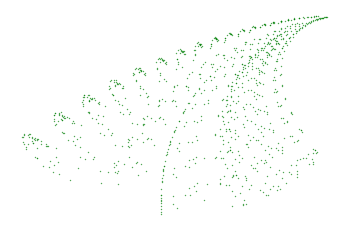

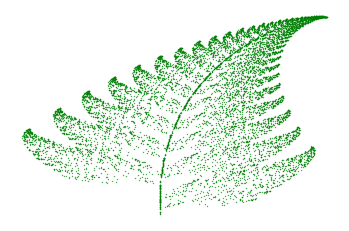

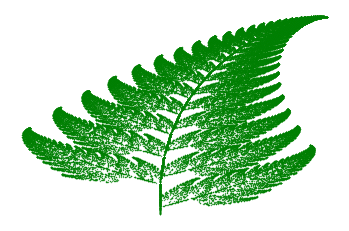

In [107]:
BarnsleyFernRandom(1000)   
BarnsleyFernRandom(10000)  
BarnsleyFernRandom(100000)  

$\textbf{El triángulo de Sierpinski mediante el juego del caos}$

Generación del triángulo de Sierpinski.

In [108]:
def SierpinskiTriangleRandom(num_puntos, A, B, C ):
    """
    Representa el triángulo de Sierpinski con el juego del caos

    Parámetros
    ----------
    num_puntos: número de puntos con los que se genera el triángulo de Sierpinski
    A: vértice del triángulo incial
    B: vértice del triángulo inicial
    C: vértice del triángulo inicial
    """
    
    a1, a2 = A
    b1, b2 = B
    c1, c2 = C
    
    #Defino mi triángulo ABC
    trianguloABC=[(a1,a2), (b1,b2), (c1,c2)]
    
    #Inicializo el vector
    x_p = [0]*num_puntos
    y_p = [0]*num_puntos
    
    #Genero un punto aleatorio dentro del triángulo ABC
    u1=rand.random()
    u2=rand.random()

    if u1 + u2 > 1:
        u1=1-u1
        u2=1-u2
    
    x_p[0], y_p[0]= u1*(b1-a1) + u2*(b2-a2) , u1*(c1-a1) +u2*(c2-a2) 

    
    #Lanzo el "dado" y según el número añado el nuevo punto al vector
    for i in range (1,num_puntos):
        random=rand.randint(1,3)
        x_p[i], y_p[i] = Midpoint (trianguloABC[random-1], (x_p[i-1],y_p[i-1]))
    
    plt.axis('off')
    plt.scatter(x_p, y_p,s=0.1, edgecolors='black')
    #plt.savefig('SierpinskiTriangleRandom.png')
    plt.show()

Triangulo de Sierpinski aleatorio con $1000$, $10000$, $100000$ puntos 

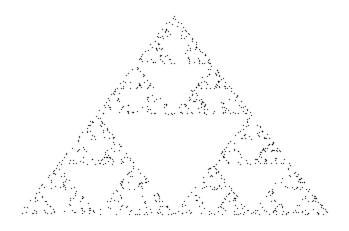

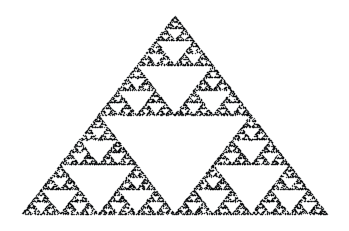

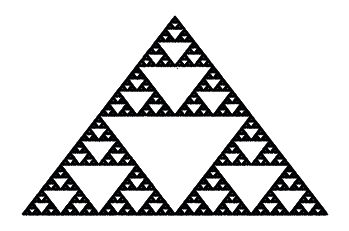

In [109]:
SierpinskiTriangleRandom(1000, [0,0], [2,2*np.sqrt(3)],[4,0] )
SierpinskiTriangleRandom(10000, [0,0], [2,2*np.sqrt(3)],[4,0] )
SierpinskiTriangleRandom(100000, [0,0], [2,2*np.sqrt(3)],[4,0] )

## 5. Dimensión fractal
La dimensión fractal o dimensión de Hausdorff es una propiedad exclusiva de los fractales. Ante la necesidad de medir esta dimensión  surgió el algoritmo box counting. 

### 5.1 Dimensión box counting
El algoritmo box counting consiste en cubrir el fractal con cajas de diferentes tamaños, hacer recuento del número de cajas que cubren el objeto y estimar la dimensión. 


En primer lugar, es necesario convertir la imagen fractal en modo RGB a una en
escala de grises. Posteriormente,  convertimos esta última imagen en un array binario, donde 
0 representa negro y 1 representa blanco. Esto es imprescindible para distinguir 
la frontera del objeto y para contar las cajas que cubren el mismo.

In [39]:
def RGB_To_BinaryGray(rgb):
    """
    Convierte una imagen en modo RGB a binaria

    Parámetros
    ----------
    rgb: imagen en modo RGB
        
    Returns
    -------
    imagen en binario
    """ 
    
    #Separamos los canales RGB y convertimos la imagen a escala de grises:
    #https://www.kite.com/python/answers/how-to-convert-an-image-from-rgb-to-grayscale-in-python
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gris = 0.2989 * r + 0.5870 * g + 0.1140 * b
    
    #Transformamos la imagen en un array binario con un cierto valor umbral. 
    #Gracias al valor umbral, convertimos estos valores en binarios. De tal forma que, si el valor del píxel es menor 
    #que el umbral entonces se convertirá en 0 (negro), en el caso contrario será 1 (blanco)
    #https://datacarpentry.org/image-processing/07-thresholding/
    
    umbral=0.7
    binario = (gris < umbral)

    return binario

A continuación, nos disponemos a contar el número de cajas que cubren el fractal. Tenemos una imagen binaria 'img' 
con valores de pixeles: 0 o 1. Calculamos la suma de todos los pixeles por cada bloque 'dim_caja x dim_caja' 
y contamos cuantos bloques tienen una suma entre 0 (cada pixel en este bloque es negro) y dim_caja*dim_caja (cada pixel en este bloque es blanco).
Si el bloque cumple esta condición entonces cubre pixeles blancos y negros, en otras palabras, cubre
la frontera del objeto.

In [40]:
def conteo_cajas(img, dim_caja):
    """
    Cuenta el número de cajas que cubren un fractal

    Parámetros
    ----------
    img: imagen fractal
    dim_caja: dimensión de la caja
        
    Returns
    -------
    Número de cajas que cubren el fractal
    """ 
    
    #Dada una matríz de píxeles de tamaño img.shape[0] x img.shape[1], calcumos la suma por bloques de dim_caja x dim_caja 
    #Ejercicio 65 de : https://pythonworld.ru/numpy/100-exercises.html
    img_reducida = np.add.reduceat(np.add.reduceat(img, np.arange(0, img.shape[0], dim_caja), axis=0),np.arange(0, img.shape[1], dim_caja), axis=1)

    num_cajas=0
    for i in range (img_reducida.shape[0]):
        for j in range (img_reducida.shape[1]):
            if img_reducida[i][j] >0 and img_reducida[i][j] < dim_caja*dim_caja:
                num_cajas+=1
        
    return num_cajas

Aplicamos algoritmo box counting

In [41]:
def BoxCountingDimension(img):
    """
    Algoritmo Box counting.
    
    Parámetros
    ----------
    img: imagen fractal
        
    Returns
    -------
    Dimensión fractal resultante 
    """ 
    
    #Tomamos la dimensión más pequeña entre largo y ancho 
    dim_min = min(img.shape)
    #Tomamos la mayor potencia de 2 menor o igual que la dimensión mínima
    n = 2**np.floor(np.log(dim_min)/np.log(2))
    #Sacamos el exponente
    n = int(np.log(n)/np.log(2))
    #Construimos las dimensiones de las cajas que irán de 2**n a 2**1
    dimensiones = 2**np.arange(n,1,-1)
    #Array donde almacenaremos el número de cajas 
    cajas = []
    
    #Aplicamos el conteo de cajas a cada una de las dimensiones 
    for dimension in dimensiones:
        num_cajas=conteo_cajas(img, dimension)
        cajas.append(num_cajas)
        print("Si la dimensión de la caja es de ", dimension, " píxeles y el número de cajas es ", num_cajas )
     
    #Representamos el número de cajas en relación a su dimensión
    plt.plot(dimensiones, cajas, '^',marker="o" )
    plt.xlabel("Dimensión de la caja: $2^n$ n=1, 2, 3, ...")
    plt.ylabel("Número de Cajas $N_n(A)$")
    plt.show()

    #Aplicación de la función logarítmica dela gráfica anterior 
    plt.plot(-np.log(dimensiones), np.log(cajas),'^', marker="o", color="orange",label=" Puntos obtenidos al aplicar logaritmos")
    #Ajuste polinomial de grado 1 a las funciones logarítmicas 
    coeficientes = np.polyfit(-np.log(dimensiones), np.log(cajas), 1)
    plt.plot(-np.log(dimensiones), [coeficientes[0]*i+coeficientes[1] for i in -np.log(dimensiones) ], color="black", label="Ajuste polinomial de mínimos cuadrados")
    plt.xlabel("- ln($2^n$) n=1, 2, 3, ... ")
    plt.ylabel("ln($N_n(A)$)")
    plt.legend(loc='best')
    plt.show()
    #print("La recta de mejor ajuste de la gráfica logarítmica es: ", coeficientes[0],"x +", coeficientes[1])
    
    #Representación gráfica de las cajas.
       
    #Dimensiones de la zona de las cajas y de la imagen.
    xmin, xmax = 0, img.shape[1]
    ymin, ymax = 0, img.shape[0]
    
    contador=0
    
    for dim in dimensiones:
        
        print("Representación gráfica del conteo de cajas de ", dim, "pixeles")
        
        #Creamos una figura con una cierta dimensión 
        fig, ax = plt.subplots(figsize=(10*len(dimensiones),5*len(dimensiones)))
        
        #Creamos un conjunto de subtramas, es decir, un conjunto de imágenes (1 por dimensión de la caja).
        #De no hacerlo, solo imprime por salida la última imagen
        ax = plt.subplot(1, len(dimensiones), contador+1 )

        """
        matplotlib.pyplot.imshow():  Muestra una imagen en 2D. Para ilustrar una imagen en escala de 
        grises tenemos que configurar los parámetros cmap='gray', vmin=0 y vmax=1. Donde vmin y vmax
        representan el rango que cubre el mapa de colores. 'Extend' delimita el tamaño de la imagen, es útil
        para el correcto posicionamiento de las cajas.
        https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
        """
        ax.imshow(1.0-img, cmap='gray', vmin=0, vmax=1,
                  extent=[xmin, xmax, ymin, ymax])
        
        #Quitamos los ejes de las imágenes
        ax.set_axis_off()
         
        #Dada una matríz de píxeles de tamaño img.shape[0] x img.shape[1], calcumos la suma por bloques de dim x dim 
        #Ejercicio 65 de : https://pythonworld.ru/numpy/100-exercises.html
        img_reducida=np.add.reduceat(np.add.reduceat(img, np.arange(0, img.shape[0], dim), axis=0),np.arange(0, img.shape[1], dim), axis=1)
        
        #Recorremos los píxeles de la imagen en bloques.
        for i in range (img_reducida.shape[0]):
            for j in range (img_reducida.shape[1]):
                #Comprobamos si el color se encuentra entre el blanco y negro
                if img_reducida[i][j] >0 and img_reducida[i][j] < dim*dim:
                    #En cuyo caso, creamos un rectángulo con la herramienta matplotlib.patches y lo añadimos a la figura. Es importante el buen
                    #posicionamiento de este
                     rect = patches.Rectangle( (j*dim, img.shape[0]-(i+1)*dim), width=dim, height=dim, edgecolor='0.15',facecolor='0.5', alpha=0.5)
                     ax.add_patch(rect) 
        plt.show()
        contador+=1
        
        
    return coeficientes[0]


Algoritmo box counting para el conjunto de Cantor en la iteración 9

Si la dimensión de la caja es de  8  píxeles y el número de cajas es  33
Si la dimensión de la caja es de  4  píxeles y el número de cajas es  50


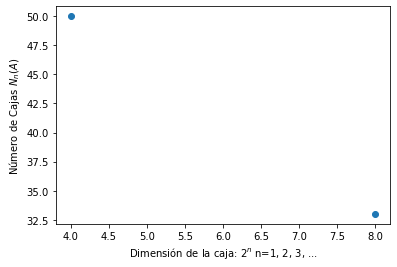

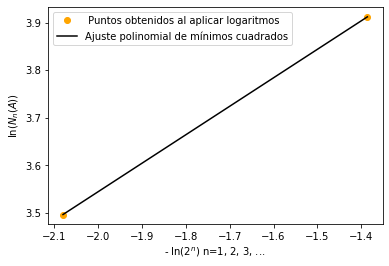

Representación gráfica del conteo de cajas de  8 pixeles


Representación gráfica del conteo de cajas de  4 pixeles


La dimensión boxcounting del conjunto de Cantor es  0.5994620704162734


In [43]:
fractal_img=RGB_To_BinaryGray(pl.imread("Images/BoxCountingDimension/CantorSet9.png"))
print("La dimensión boxcounting del conjunto de Cantor es ", BoxCountingDimension(fractal_img))

Algoritmo box counting para curva de Koch en la iteración 8

Si la dimensión de la caja es de  64  píxeles y el número de cajas es  9
Si la dimensión de la caja es de  32  píxeles y el número de cajas es  28
Si la dimensión de la caja es de  16  píxeles y el número de cajas es  57
Si la dimensión de la caja es de  8  píxeles y el número de cajas es  144
Si la dimensión de la caja es de  4  píxeles y el número de cajas es  344


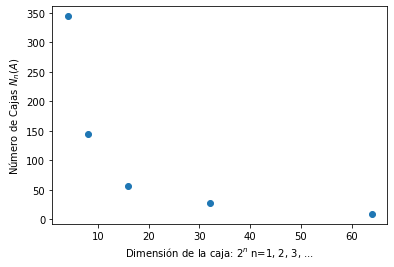

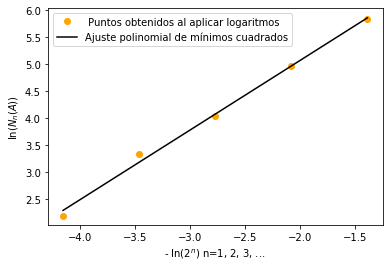

Representación gráfica del conteo de cajas de  64 pixeles


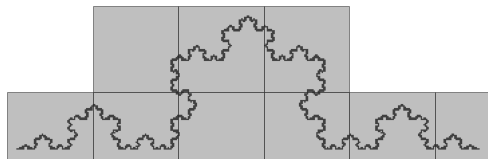

Representación gráfica del conteo de cajas de  32 pixeles


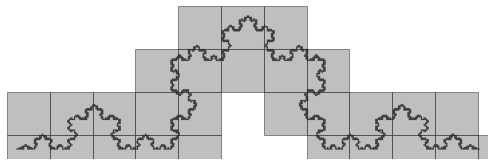

Representación gráfica del conteo de cajas de  16 pixeles


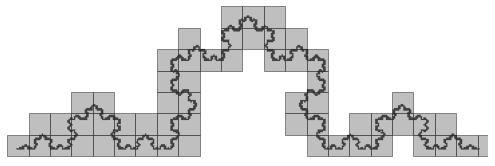

Representación gráfica del conteo de cajas de  8 pixeles


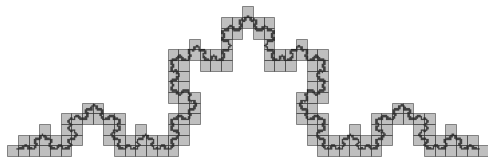

Representación gráfica del conteo de cajas de  4 pixeles


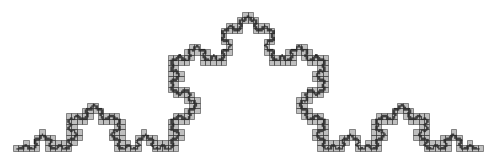

La dimensión box counting de la curva de Koch es  1.2875249585904291


In [44]:
fractal_img=RGB_To_BinaryGray(pl.imread("Images/BoxCountingDimension/KochCurve8.png"))
print("La dimensión box counting de la curva de Koch es ", BoxCountingDimension(fractal_img))

Algoritmo box counting para el triángulo de Sierpinski

Si la dimensión de la caja es de  512  píxeles y el número de cajas es  5
Si la dimensión de la caja es de  256  píxeles y el número de cajas es  15
Si la dimensión de la caja es de  128  píxeles y el número de cajas es  48
Si la dimensión de la caja es de  64  píxeles y el número de cajas es  160
Si la dimensión de la caja es de  32  píxeles y el número de cajas es  470
Si la dimensión de la caja es de  16  píxeles y el número de cajas es  1352
Si la dimensión de la caja es de  8  píxeles y el número de cajas es  3991
Si la dimensión de la caja es de  4  píxeles y el número de cajas es  10993


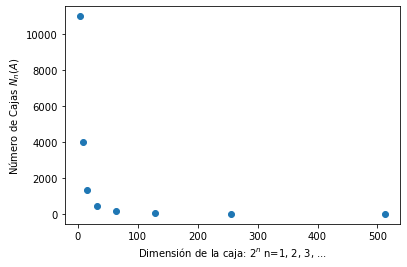

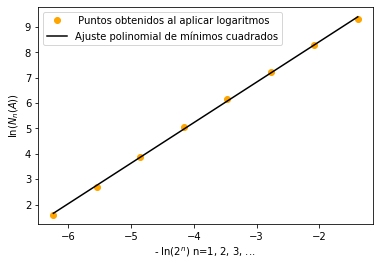

Representación gráfica del conteo de cajas de  512 pixeles


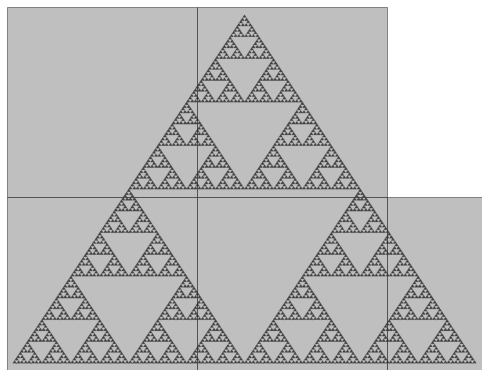

Representación gráfica del conteo de cajas de  256 pixeles


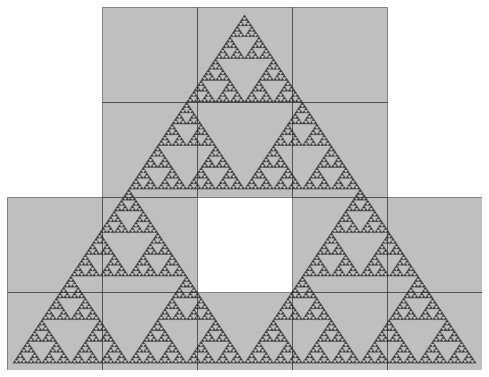

Representación gráfica del conteo de cajas de  128 pixeles


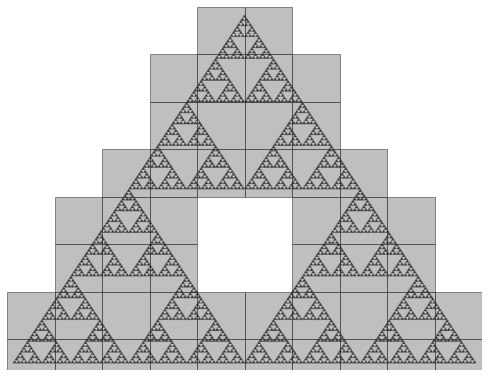

Representación gráfica del conteo de cajas de  64 pixeles


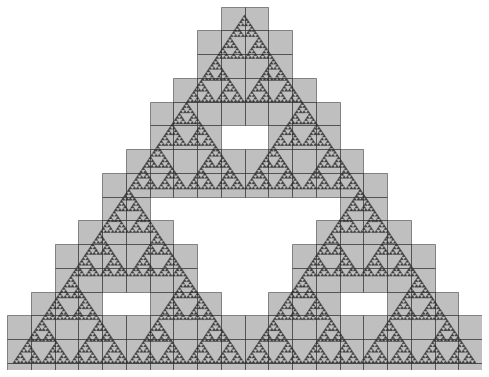

Representación gráfica del conteo de cajas de  32 pixeles


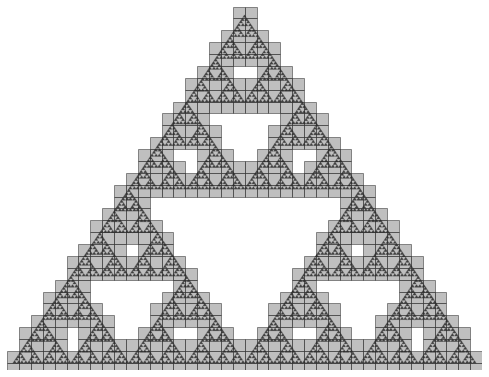

Representación gráfica del conteo de cajas de  16 pixeles


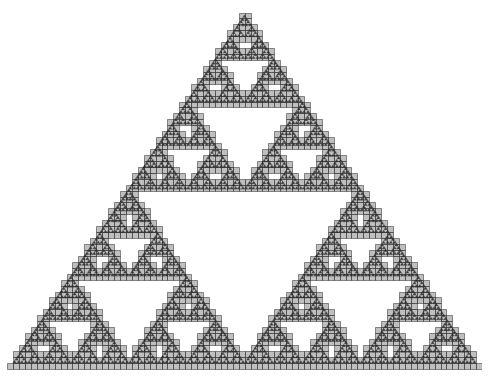

Representación gráfica del conteo de cajas de  8 pixeles


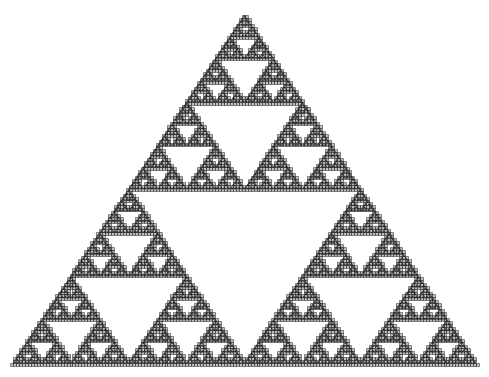

Representación gráfica del conteo de cajas de  4 pixeles


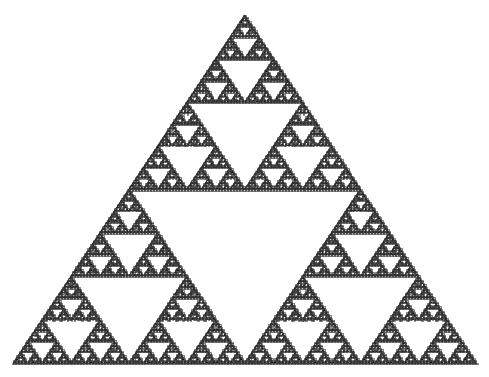

La dimensión box counting del triangulo de Sierpinski es  1.5952041138147912


In [45]:
fractal_img=RGB_To_BinaryGray(pl.imread("Images/BoxCountingDimension/Sierpinski.png"))
print("La dimensión box counting del triangulo de Sierpinski es ", BoxCountingDimension(fractal_img))

Algoritmo box counting para el cuadrado de Koch en la iteración 5

Si la dimensión de la caja es de  512  píxeles y el número de cajas es  4
Si la dimensión de la caja es de  256  píxeles y el número de cajas es  10
Si la dimensión de la caja es de  128  píxeles y el número de cajas es  30
Si la dimensión de la caja es de  64  píxeles y el número de cajas es  70
Si la dimensión de la caja es de  32  píxeles y el número de cajas es  173
Si la dimensión de la caja es de  16  píxeles y el número de cajas es  420
Si la dimensión de la caja es de  8  píxeles y el número de cajas es  1074
Si la dimensión de la caja es de  4  píxeles y el número de cajas es  2826


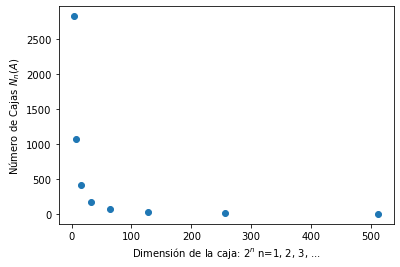

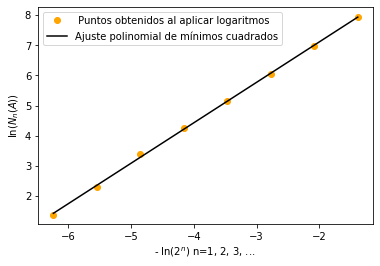

Representación gráfica del conteo de cajas de  512 pixeles


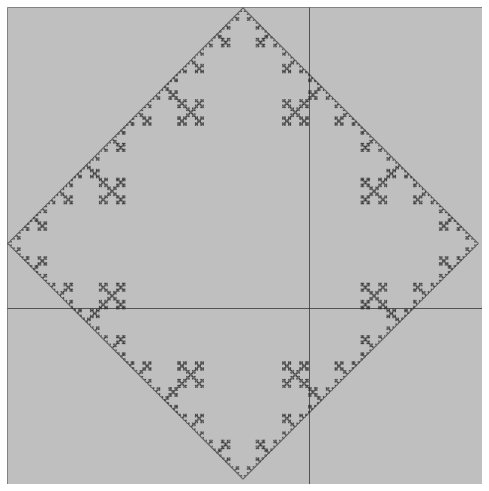

Representación gráfica del conteo de cajas de  256 pixeles


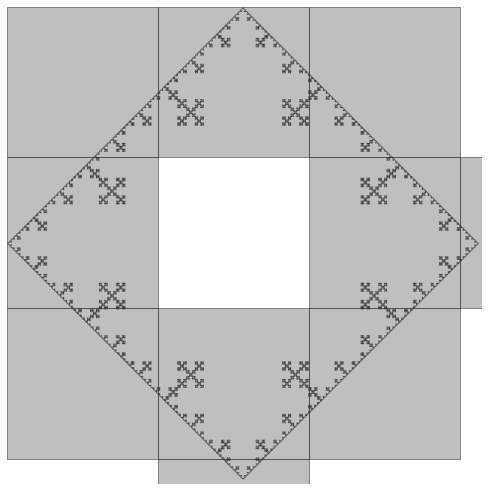

Representación gráfica del conteo de cajas de  128 pixeles


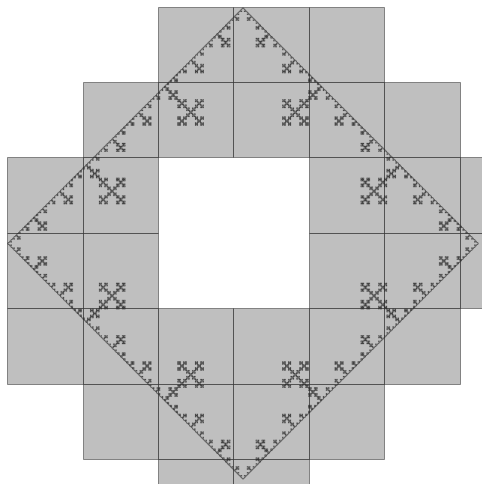

Representación gráfica del conteo de cajas de  64 pixeles


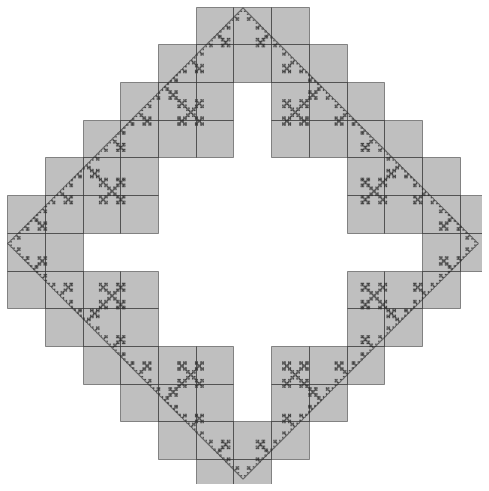

Representación gráfica del conteo de cajas de  32 pixeles


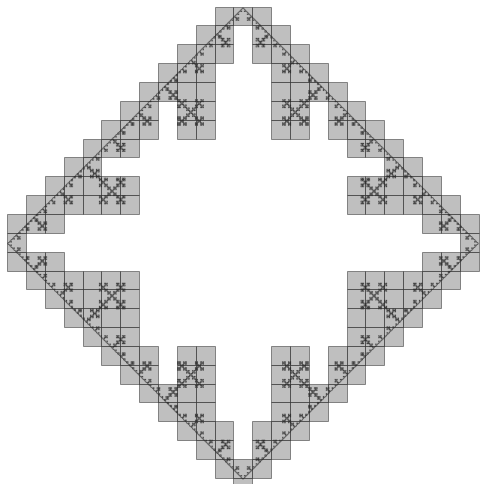

Representación gráfica del conteo de cajas de  16 pixeles


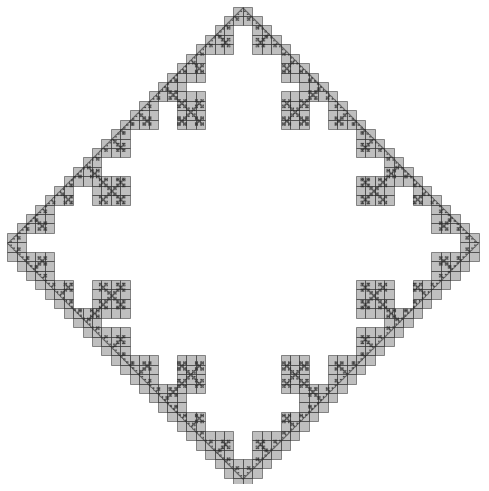

Representación gráfica del conteo de cajas de  8 pixeles


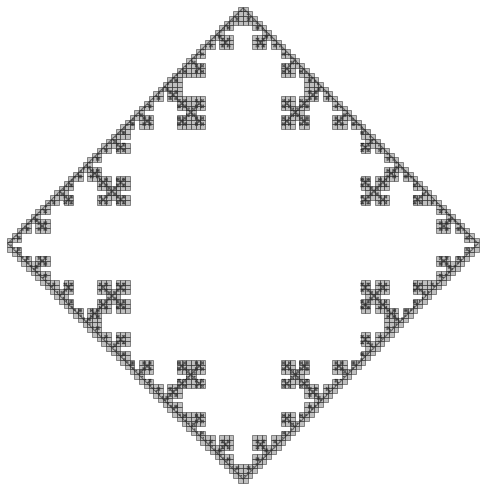

Representación gráfica del conteo de cajas de  4 pixeles


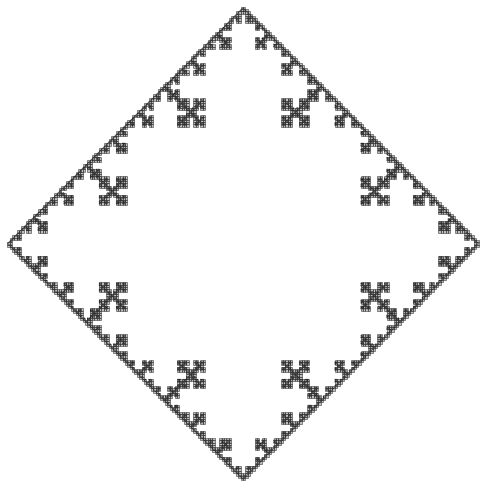

La dimensión box counting del cuadrado de Koch es  1.3418271564844326


In [46]:
fractal_img=RGB_To_BinaryGray(pl.imread("Images/BoxCountingDimension/KochSquare5.png"))
print("La dimensión box counting del cuadrado de Koch es ", BoxCountingDimension(fractal_img))

Algoritmo box counting para la curva de Hilbert

Si la dimensión de la caja es de  256  píxeles y el número de cajas es  4
Si la dimensión de la caja es de  128  píxeles y el número de cajas es  9
Si la dimensión de la caja es de  64  píxeles y el número de cajas es  36
Si la dimensión de la caja es de  32  píxeles y el número de cajas es  144
Si la dimensión de la caja es de  16  píxeles y el número de cajas es  529
Si la dimensión de la caja es de  8  píxeles y el número de cajas es  2025
Si la dimensión de la caja es de  4  píxeles y el número de cajas es  7744


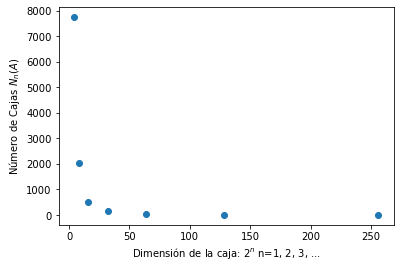

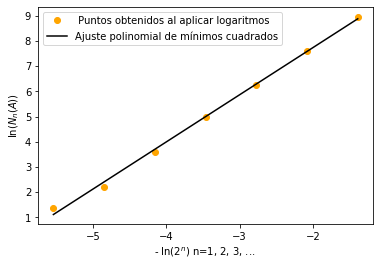

Representación gráfica del conteo de cajas de  256 pixeles


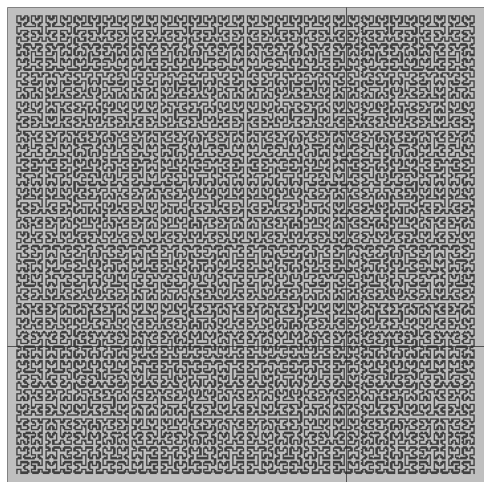

Representación gráfica del conteo de cajas de  128 pixeles


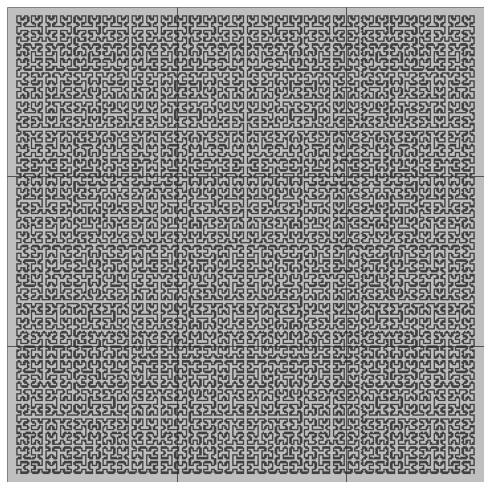

Representación gráfica del conteo de cajas de  64 pixeles


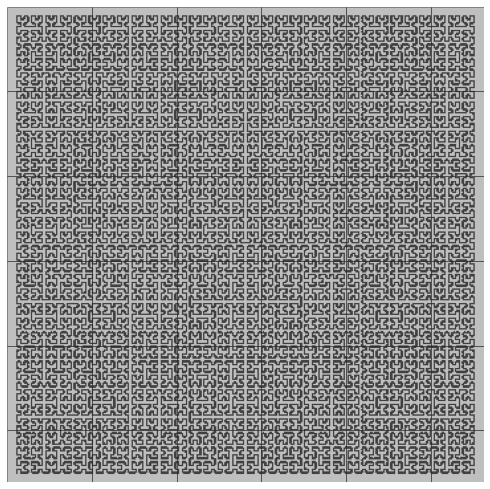

Representación gráfica del conteo de cajas de  32 pixeles


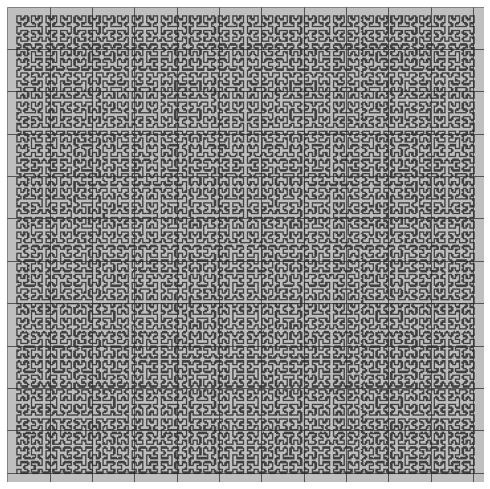

Representación gráfica del conteo de cajas de  16 pixeles


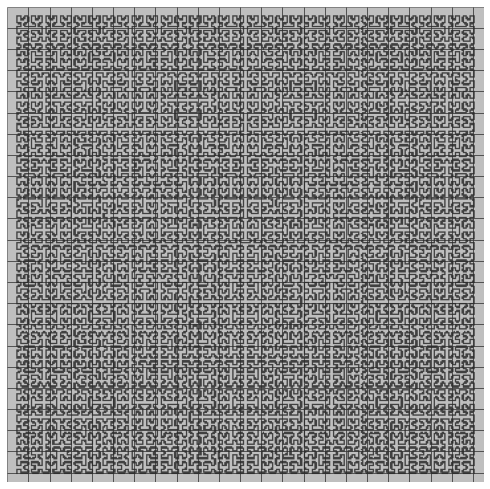

Representación gráfica del conteo de cajas de  8 pixeles


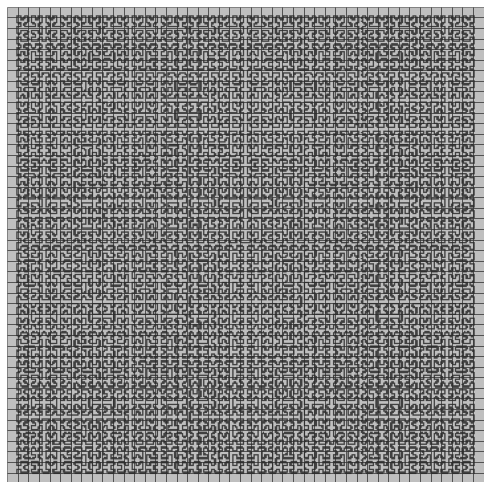

Representación gráfica del conteo de cajas de  4 pixeles


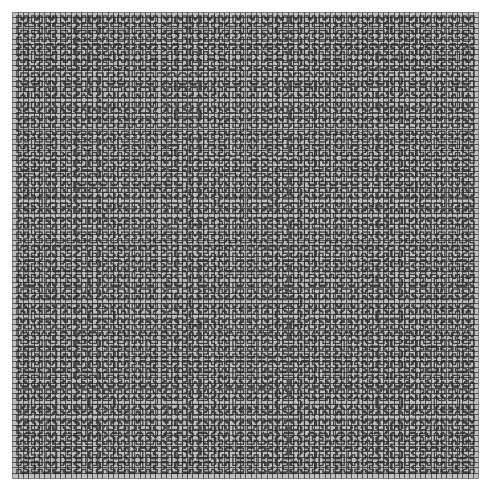

La dimensión box counting de la curva de Hilbert es  1.8664768216046275


In [47]:
fractal_img=RGB_To_BinaryGray(pl.imread("Images/BoxCountingDimension/HilbertCurve.png"))
print("La dimensión box counting de la curva de Hilbert es ", BoxCountingDimension(fractal_img))